In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scalarhadronizer import ScalarHadronizer
from particle import Particle as p
#using the hipsofcobra code to generate pi+pi- and K+K- decay widths, see https://arxiv.org/pdf/2407.13587
#from hipsofcobra import HipsofCobra
import pickle
import os
from iminuit import Minuit
plt.style.use('plotstyle.mplstyle')

# pi and K decay widths from literature

In [2]:
#hips_pi = HipsofCobra( clist=[1,1,1], Pname='pi', method='DGL')
#hips_pi.write_widths()
pi_data=np.loadtxt('hipsofcobra/clist=[1, 1, 1]/widths_data_c=[1, 1, 1]_pi_method=DGL.csv',delimiter=',',skiprows=1)
m=pi_data[:,0]
gamma_pi_central=pi_data[:,1][m==2.0][0]
gamma_pi_lower=pi_data[:,2][m==2.0][0]
gamma_pi_upper=pi_data[:,3][m==2.0][0]
pi_width_2GeV=gamma_pi_central
print(pi_width_2GeV)

5.008185005808889e-08


In [3]:
#hips_K = HipsofCobra( clist=[1,1,1], Pname='K', method='DGL')
#hips_K.write_widths()
K_data=np.loadtxt('hipsofcobra/clist=[1, 1, 1]/widths_data_c=[1, 1, 1]_K_method=DGL.csv',delimiter=',',skiprows=1)
m=K_data[:,0]
gamma_K_central=K_data[:,1][m==2.0][0]
gamma_K_lower=K_data[:,2][m==2.0][0]
gamma_K_upper=K_data[:,3][m==2.0][0]
K_width_2GeV=gamma_K_central

print(K_width_2GeV)

1.310270241863413e-07


In [4]:
gamma_K_central_last=K_data[-1,1]
gamma_K_lower_last=K_data[-1,2]
gamma_K_upper_last=K_data[-1,3]
gamma_pi_central_last=pi_data[-1,1]
gamma_pi_lower_last=pi_data[-1,2]
gamma_pi_upper_last=pi_data[-1,3]

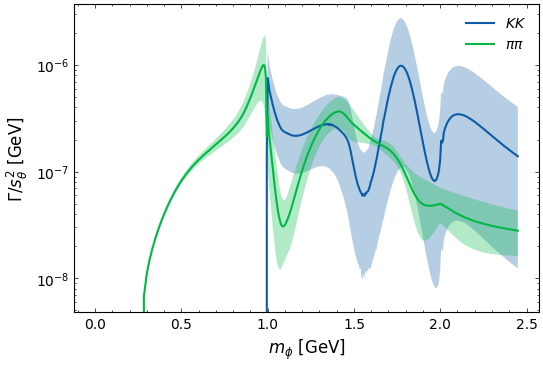

In [176]:
fig,ax=plt.subplots(figsize=(6,4))
ax.plot(K_data[:,0],K_data[:,1],label=r'$KK$')
ax.fill_between(K_data[:,0], K_data[:,2],K_data[:,3],alpha=0.3,interpolate=True)
ax.plot(pi_data[:,0],pi_data[:,1],label=r'$\pi\pi$')
ax.fill_between(pi_data[:,0], pi_data[:,2],pi_data[:,3],alpha=0.3,interpolate=True)
ax.set_yscale('log')
ax.set_xlabel(r'$m_{\phi}$ [GeV]')
ax.set_ylabel(r'$\Gamma/s_\theta^2$ [GeV]')
ax.legend()
plt.savefig('/home/henry/Documents/Uni/Masterarbeit/latex-thesis/plots/dispersive_result.pdf')

Generated 38 initial meson pairs.
The following initial states were generated:
K*(892)-[-323] K*(892)+[-323]: 0.10575449404597223
K*(892)~0[-313] K*(892)0[-313]: 0.10505698030416057
omega(782)[223] omega(782)[223]: 0.07460485116397067
omega(782)[223] h(1)(1415)[223]: 0.06510225328519126
omega(782)[223] phi(1020)[223]: 0.06293283462152438
omega(782)[223] h(1)(1170)[223]: 0.05333319188866702
rho(770)-[-213] rho(770)+[-213]: 0.04964538315716953
phi(1020)[333] phi(1020)[333]: 0.047119567198943633
K-[-321] K+[-321]: 0.03361036070668834
K~0[-311] K0[-311]: 0.03354955612576682
phi(1020)[333] h(1)(1170)[333]: 0.03166811473720199
omega(782)[223] omega(1420)[223]: 0.029578107824446254
eta[221] f(1)(1420)[221]: 0.02795895845982472
rho(770)0[113] rho(770)0[113]: 0.02481869193700363
eta[221] eta[221]: 0.019894907610377443
eta[221] f(1)(1285)[221]: 0.01949154461579217
eta[221] eta(1475)[221]: 0.017144262851156285
eta[221] eta(2)(1645)[221]: 0.016915379174798538
eta[221] eta'(958)[221]: 0.01683159929

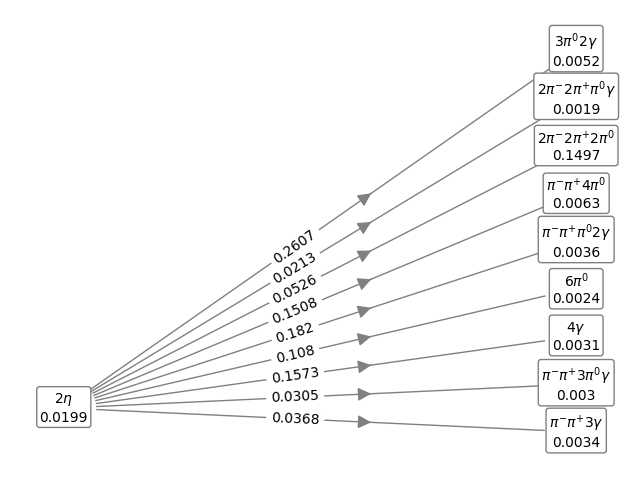

{(310, 310): 1, (-213, 213): 1, (111, 20113): 2, (-211, 111, 111, 211): 0, (9010221, 9010221): 1, (-211, 111, 213): 1, (-213, 111, 211): 1, (-311, 311): 2, (225, 9010221): 1}


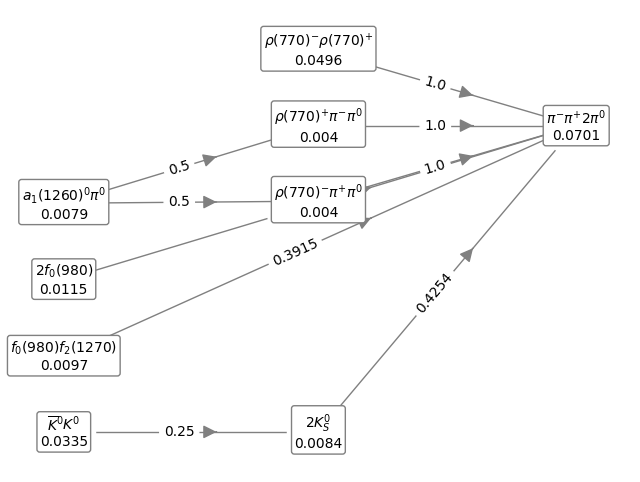

In [ ]:
#Plot of a graph for the thesis:
SH=ScalarHadronizer(2300,strange_weight=1,spin_suppression=0.5)
decay_graph=SH.simulateDecay()
SH.print_initial_states()
SH.print_final_states(10,decay_graph)

# model likelihoods
based on https://arxiv.org/abs/2411.15499v1

In [5]:
from decay_widths import gamma_gg,gamma_ss
m_fit=2450
m_fit_gev=m_fit*1e-3
gamma_had_central=gamma_gg(m_fit_gev)+gamma_ss(m_fit_gev)
gamma_had_err=np.abs(gamma_had_central-gamma_gg(m_fit_gev,mu=2*m_fit_gev)-gamma_ss(m_fit_gev,mu=2*m_fit_gev))
gamma_had_upper=gamma_had_central+gamma_had_err
gamma_had_lower=gamma_had_central-gamma_had_err
print(gamma_had_central,gamma_had_err)

results_dict={'gamma_pi': gamma_pi_central_last,'sigma_pi_upper': gamma_pi_upper_last,'sigma_pi_lower': gamma_pi_lower_last,'gamma_K': gamma_K_central_last,'sigma_K_upper': gamma_K_upper_last,'sigma_K_lower': gamma_K_lower_last,'gamma_had': gamma_had_central,'sigma_had_lower':gamma_had_central-gamma_had_err,'sigma_had_upper':gamma_had_central+gamma_had_err}

6.552215763470703e-07 6.92944119622989e-08


In [6]:
def logL_model(a,central,upper,lower):
    sigp=upper-central
    sigm=central-lower
    sigma1=2*sigp*sigm/(sigp+sigm)
    sigma2=(sigp-sigm)/(sigp+sigm)
    return -0.5*(a-central)**2/(sigma1+(a-central)*sigma2)**2

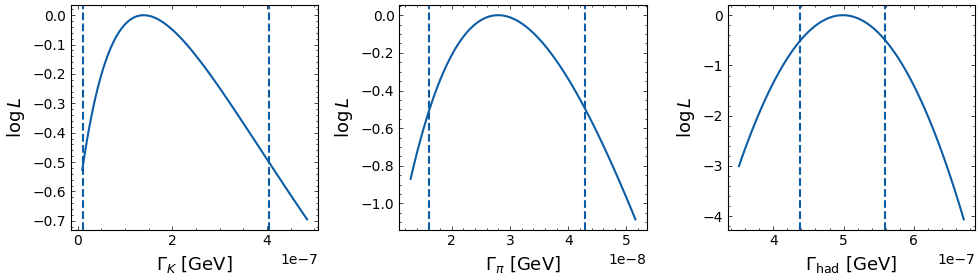

In [175]:
fig,axis=plt.subplots(1,3,figsize=(10,3))
for i,(upper,lower,central,x_label) in enumerate(zip([gamma_K_upper_last,gamma_pi_upper_last,gamma_had_upper],[gamma_K_lower_last,gamma_pi_lower_last,gamma_had_lower],[gamma_K_central_last,gamma_pi_central_last,gamma_had_central],[r'$\Gamma_K$ [GeV]',r'$\Gamma_\pi$ [GeV]',r'$\Gamma_\mathrm{had}$ [GeV]'])):
    x=np.linspace(lower*0.8,upper*1.2,100)
    axis[i].plot(x,logL_model(x,central,upper,lower))
    axis[i].axvline(lower,linestyle='--',label='lower boundary')
    axis[i].axvline(upper,linestyle='--',label='upper boundary')
    axis[i].set_xlabel(x_label,fontsize=13)
    axis[i].set_ylabel(r'$\log L$',fontsize=13)
plt.tight_layout()
plt.savefig('/home/henry/Documents/Uni/Masterarbeit/latex-thesis/plots/nlls.pdf')

# fit with iminuit

## suppression_mode: spin

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 9.141e-07                  │              Nfcn = 302              │
│ EDM = 9.14e-07 (Goal: 0.0001)    │            time = 3.7 sec            │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│     SOME parameters at limit     │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬───────────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name      │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼───────────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ ws        │    1.1    │    2.6    │    -1.1    │    2.5     │    0    │   10    │       │
│ 1 │ wv        │   0.07    │   0.21    │   -0.07    │    0.28    │    0    │    1    │       │
│ 2 │ gamma_fac │   1.00    │   0.11    │   -0.11    │    0.11    │    0    │   10    │       │
└───┴───────────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌──────────┬───────────────────────┬───────────────────────┬───────────────────────┐
│          │          ws           │          wv           │       gamma_fac       │
├──────────┼───────────┬───────────┼───────────┬───────────┼───────────┬───────────┤
│  Error   │   -1.1    │    2.5    │   -0.07   │   0.28    │   -0.11   │   0.11    │
│  Valid   │   True    │   True    │   True    │   True    │   True    │   True    │
│ At Limit │   True    │   False   │   True    │   False   │   False   │   False   │
│ Max FCN  │   False   │   False   │   False   │   False   │   False   │   False   │
│ New Min  │   False   │   False   │   False   │   False   │   False   │   False   │
└──────────┴───────────┴───────────┴───────────┴───────────┴───────────┴───────────┘
┌───────────┬───────────────────────────────┐
│           │        ws        wv gamma_fac │
├───────────┼───────────────────────────────┤
│        ws │      9.56     -0.72     0.002 │
│        wv │     -0.72    0.0608     0.002 │
│ gamma_fac │     0.002     0.002    0.0112 │
└───────────┴───────────────────────────────┘

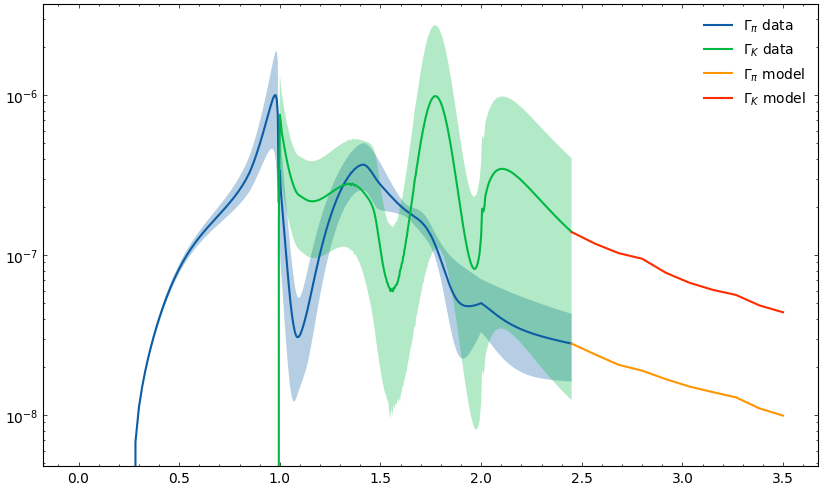

In [7]:
from scalarhadronizer import ScalarHadronizer

from iminuit import Minuit
m_fit=2450
SH_fit=ScalarHadronizer(scalar_mass=m_fit,suppression_mode='spin')
meson_list=SH_fit.initialize_meson_list_for_parameter_fits()

def nll_minuit(ws,wv,gamma_fac):
    br_pi,br_K,gamma_pi,gamma_K=SH_fit.parameter_fit_func(ws,wv,gamma_fac,meson_list)
    return -logL_model(gamma_pi,gamma_pi_central_last,gamma_pi_upper_last,gamma_pi_lower_last)-logL_model(gamma_K,gamma_K_central_last,gamma_K_upper_last,gamma_K_lower_last)-logL_model(gamma_fac,1,gamma_had_upper/gamma_had_central,gamma_had_lower/gamma_had_central)

m = Minuit(nll_minuit, ws=1,wv=0.5,gamma_fac=1)
m.limits=[(0,10),(0,1),(0,10)]
m.errordef = Minuit.LIKELIHOOD
m.migrad()
m.hesse()
SH_fit.set_parameters(strange_weight=m.params[0].value,spin_suppression=m.params[1].value,gamma_fac=m.params[2].value,ud_weight=1,charm_weight=0,bottom_weight=0)
display(m.minos())

ws_opt=m.params[0].value
wv_opt=m.params[1].value
gamma_fac_opt=m.params[2].value
cov_matrix=np.array(m.covariance)

m_list=np.linspace(m_fit*1e-3,3.5,10)
pi_list=[]
K_list=[]
for mass in m_list:
    SH=ScalarHadronizer(scalar_mass=mass*1e3,strange_weight=ws_opt,spin_suppression=wv_opt,suppression_mode='spin',gamma_fac=gamma_fac_opt)
    meson_list2=SH.initialize_meson_list_for_parameter_fits()
    br_pi,br_K,gamma_pi,gamma_K=SH.parameter_fit_func(ws_opt,wv_opt,gamma_fac_opt,meson_list2)
    pi_list.append(gamma_pi)
    K_list.append(gamma_K)
    

fig,ax=plt.subplots(figsize=(10,6))
ax.plot(pi_data[:,0],pi_data[:,1],label=r'$\Gamma_\pi$ data')
ax.fill_between(pi_data[:,0], pi_data[:,2],pi_data[:,3],alpha=0.3,interpolate=True)
ax.plot(K_data[:,0],K_data[:,1],label=r'$\Gamma_K$ data')
ax.fill_between(K_data[:,0], K_data[:,2],K_data[:,3],alpha=0.3,interpolate=True)

ax.plot(m_list,pi_list,label=r'$\Gamma_\pi$ model')
ax.plot(m_list,K_list,label=r'$\Gamma_K$ model')
ax.set_yscale('log')
plt.legend()


In [14]:
ws_upper=m.merrors['ws'].upper
wv_upper=m.merrors['wv'].upper
gamma_fac_upper=m.merrors['gamma_fac'].upper
gamma_fac_lower=abs(m.merrors['gamma_fac'].lower)
likelihood_spin=m.fval

In [15]:
def write_result_to_file(result_dict):
    with open('/home/henry/Documents/Uni/Masterarbeit/latex-thesis/fitdata.dat', 'w') as file:
        for key, value in result_dict.items():
            precision=3
            rounded_val=np.round(value,precision)
            file.write(f"{key},{value}\n")

In [16]:
results_dict['ws']=ws_opt
results_dict['av']=wv_opt
results_dict['a_gamma']=gamma_fac_opt
results_dict['likelihood_spin']=m.fval


results_dict['ws_upper']=ws_upper
results_dict['av_upper']=wv_upper
results_dict['a_gamma_upper']=gamma_fac_upper
results_dict['a_gamma_lower']=gamma_fac_lower
for i in [1,2,3]:
    for j in [1,2,3]:
        name='c'+str(i)+str(j)
        results_dict[name]=cov_matrix[i-1,j-1]

#write_result_to_file(results_dict)

### likelihood contours

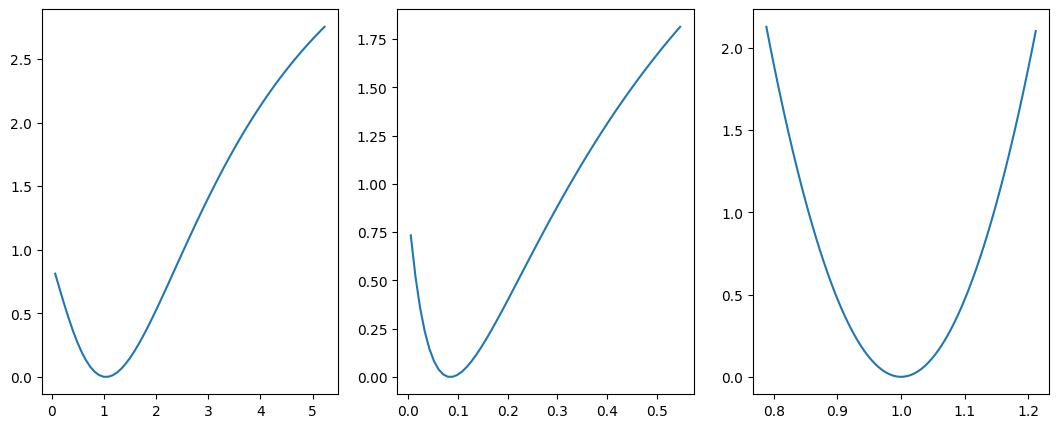

In [28]:
#likelihood profiles
fig,axis=plt.subplots(1,3,figsize=(13,5))
for i,a in enumerate(['ws','wv','gamma_fac']):
    x,y=m.profile(a)
    axis[i].plot(x[x>0],y[x>0])

(array([-8.45169009e-01, -7.39003179e-01, -6.32837350e-01, -5.26671520e-01,
        -4.20505690e-01, -3.14339860e-01, -2.08174031e-01, -1.02008201e-01,
         4.15762891e-03,  1.10323459e-01,  2.16489288e-01,  3.22655118e-01,
         4.28820948e-01,  5.34986778e-01,  6.41152607e-01,  7.47318437e-01,
         8.53484267e-01,  9.59650097e-01,  1.06581593e+00,  1.17198176e+00,
         1.27814759e+00,  1.38431342e+00,  1.49047925e+00,  1.59664508e+00,
         1.70281090e+00,  1.80897673e+00,  1.91514256e+00,  2.02130839e+00,
         2.12747422e+00,  2.23364005e+00,  2.33980588e+00,  2.44597171e+00,
         2.55213754e+00,  2.65830337e+00,  2.76446920e+00,  2.87063503e+00,
         2.97680086e+00,  3.08296669e+00,  3.18913252e+00,  3.29529835e+00,
         3.40146418e+00,  3.50763001e+00,  3.61379584e+00,  3.71996167e+00,
         3.82612750e+00,  3.93229333e+00,  4.03845916e+00,  4.14462499e+00,
         4.25079082e+00,  4.35695665e+00]),
 array([-1.87219825, -1.79577883, -1.7193594

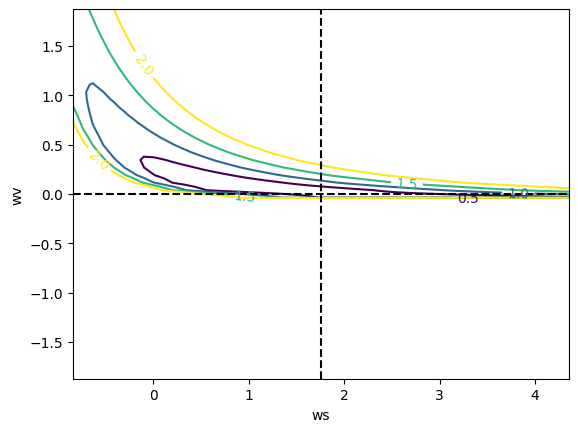

In [48]:
m.draw_contour('ws','wv')

In [87]:
def get_contour(contour_name,par1,par2,cl=0.68,exp=False):
    file_path=f'pkls_for_plots/{contour_name}.pkl'
    if os.path.exists(file_path):
        with open(file_path, 'rb') as f:
            contour = pickle.load(f)
    else:
        if exp: contour=m.mncontour(par1,par2,cl=cl,experimental=True,ncall=5)
        else: contour=m.mncontour(par1,par2,interpolated=400,cl=cl)
        with open(file_path,'wb') as f:
            pickle.dump(contour,f)
    return contour

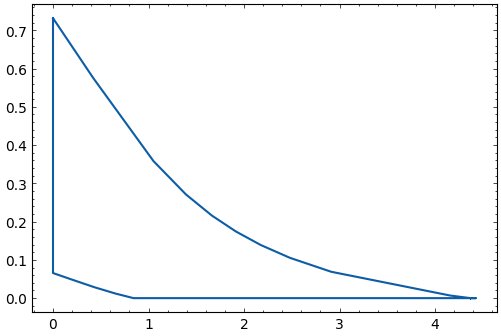

In [29]:
contour_wswv=get_contour('contour_wswv_experimental','ws','wv',exp=True)
plt.plot(contour_wswv[:,0],contour_wswv[:,1])

In [88]:
contour_wvgamma=get_contour('contour_wvgamma','wv','gamma_fac',exp=False)
contour_wvgamma_exp=get_contour('contour_wvgamma_experimental2','wv','gamma_fac',exp=True)

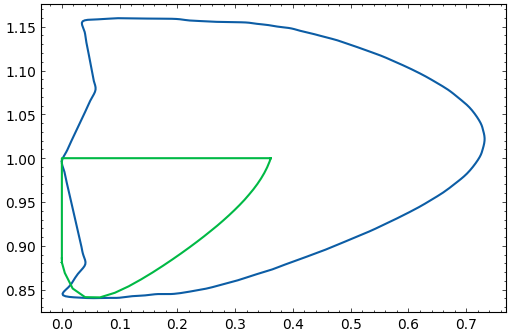

In [89]:
plt.plot(contour_wvgamma[:,0],contour_wvgamma[:,1])
plt.plot(contour_wvgamma_exp[:,0],contour_wvgamma_exp[:,1])
#plt.plot(contour_wvgamma_exp[:,0],2-contour_wvgamma_exp[:,1])

In [86]:
len(gluex)

101

[]

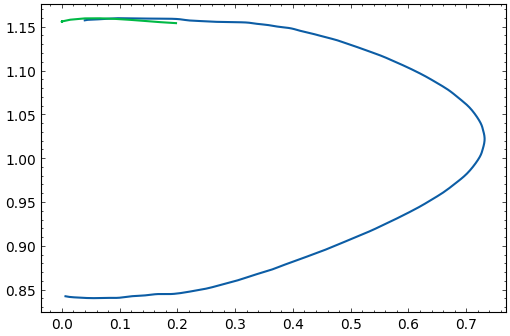

In [85]:
#fix wvgamma contour
cutoff1=65
cutoff2=335
plt.plot(contour_wvgamma[cutoff1:cutoff2,0],contour_wvgamma[cutoff1:cutoff2,1])
cutoff3=8
cutoff4=30
gluex=contour_wvgamma_exp[:,0]
gluey=2-contour_wvgamma_exp[:,1]
plt.plot(gluex[cutoff3:cutoff4],gluey[cutoff3:cutoff4])
plt.plot()

In [ ]:
contour_wswv30=get_contour('contour_wswv30','ws','wv',cl=0.3)

contour_wswv50=get_contour('contour_wswv50','ws','wv',cl=0.5)

In [18]:

contour_wswv10=get_contour('contour_wswv10','ws','wv',cl=0.3)

"\naxis[1].plot(contour_wsgamma[:,0],contour_wsgamma[:,1])\naxis[1].plot(ws_opt,gamma_fac_opt,'+',markersize=10)\naxis[1].set_xlabel(r'$w_s$')\naxis[1].set_ylabel(r'$a_{\\Gamma}$')\n#axis[2].plot(contour_wvgamma_experimental[:,0],contour_wvgamma_experimental[:,1])\naxis[2].plot(np.append(contour_wvgamma[:cutoff,0],contour_wvgamma[-1,0]),np.append(contour_wvgamma[:cutoff,1],contour_wvgamma[-1,1]))\naxis[2].plot(wv_opt,gamma_fac_opt,'+',markersize=10)\naxis[2].set_xlabel(r'$a_v$')\naxis[2].set_ylabel(r'$a_{\\Gamma}$')\naxis[0].legend()\nplt.tight_layout()\nplt.savefig('/home/henry/Documents/Uni/Masterarbeit/latex-thesis/plots/likelihood_contours.pdf')\n"

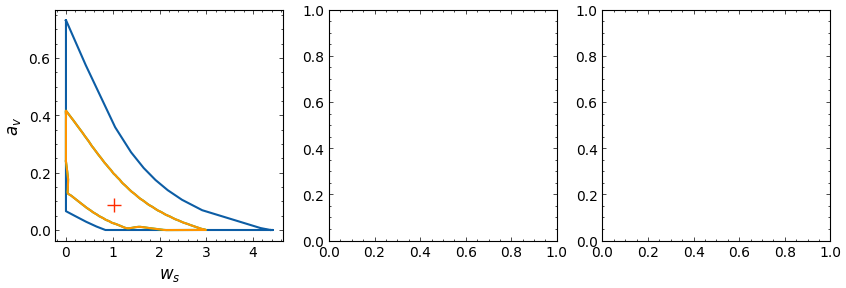

In [92]:
fig,axis=plt.subplots(1,3,figsize=(10,3))
axis[0].plot(contour_wswv[:,0],contour_wswv[:,1],label='68%')
axis[0].plot(contour_wswv10[:,0],contour_wswv10[:,1],label='30%')
axis[0].plot(contour_wswv30[:,0],contour_wswv30[:,1],label='30%')
#axis[0].plot(contour_wswv50[:,0],contour_wswv50[:,1])
axis[0].plot(ws_opt,wv_opt,'+',markersize=10,label='best fit')
axis[0].set_xlabel(r'$w_s$')
axis[0].set_ylabel(r'$a_v$')

"""
axis[1].plot(contour_wsgamma[:,0],contour_wsgamma[:,1])
axis[1].plot(ws_opt,gamma_fac_opt,'+',markersize=10)
axis[1].set_xlabel(r'$w_s$')
axis[1].set_ylabel(r'$a_{\Gamma}$')
#axis[2].plot(contour_wvgamma_experimental[:,0],contour_wvgamma_experimental[:,1])
axis[2].plot(np.append(contour_wvgamma[:cutoff,0],contour_wvgamma[-1,0]),np.append(contour_wvgamma[:cutoff,1],contour_wvgamma[-1,1]))
axis[2].plot(wv_opt,gamma_fac_opt,'+',markersize=10)
axis[2].set_xlabel(r'$a_v$')
axis[2].set_ylabel(r'$a_{\Gamma}$')
axis[0].legend()
plt.tight_layout()
plt.savefig('/home/henry/Documents/Uni/Masterarbeit/latex-thesis/plots/likelihood_contours.pdf')
"""

### result of best fit model

In [98]:
print(m_fit,ws_opt,wv_opt,gamma_fac_opt)
SH_best_fit=ScalarHadronizer(scalar_mass=m_fit,strange_weight=ws_opt,spin_suppression=wv_opt,gamma_fac=gamma_fac_opt)
SH_best_fit.simulateDecay()

2450 1.0869088736849026 0.06585601672702755 1.0000677173170829
Generated 48 initial meson pairs.


In [99]:
fs=SH_best_fit.get_final_states()
len(fs)

341

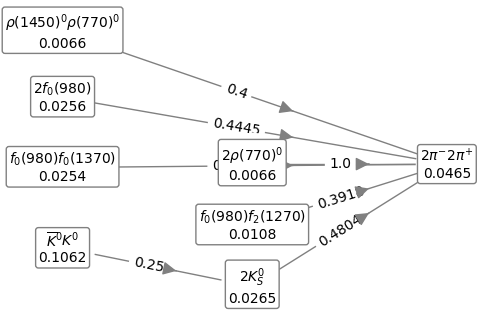

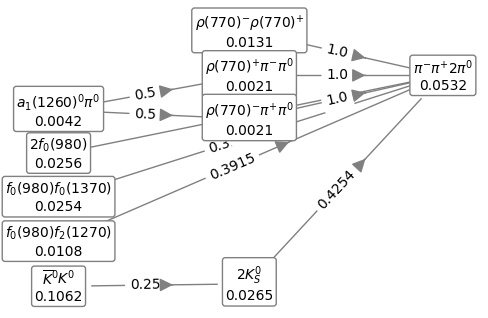

In [10]:
SH_best_fit.plot_from_final_state((-211,-211,211,211))
SH_best_fit.plot_from_final_state((-211,111,111,211))

Generated 139 initial meson pairs.


(<Figure size 400x500 with 1 Axes>, <Axes: xlabel='branching ratio'>)

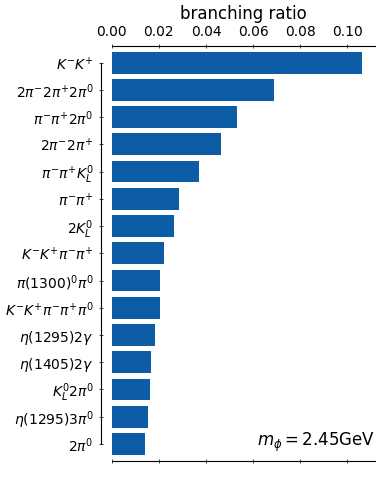

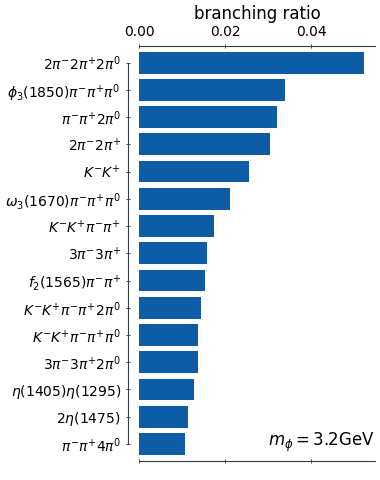

In [11]:
SH_best_fit.plot_final_state_hist(show=False,n=15,save_path='/home/henry/Documents/Uni/Masterarbeit/latex-thesis/plots/final_state_hist1.pdf')
SH_best_fit2=ScalarHadronizer(scalar_mass=3200,strange_weight=ws_opt,spin_suppression=wv_opt,gamma_fac=gamma_fac_opt)
SH_best_fit2.simulateDecay()
SH_best_fit2.plot_final_state_hist(show=False,n=15,save_path='/home/henry/Documents/Uni/Masterarbeit/latex-thesis/plots/final_state_hist2.pdf')


(<Figure size 400x500 with 1 Axes>, <Axes: xlabel='branching ratio'>)

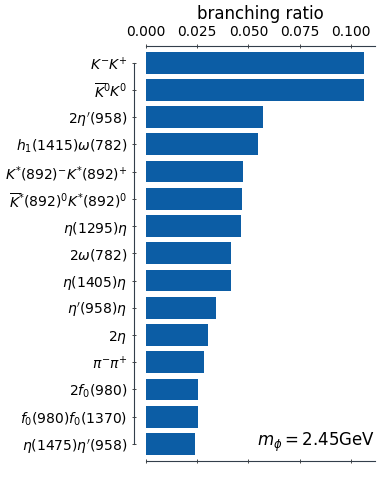

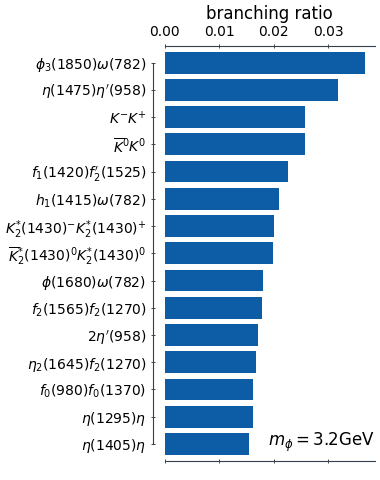

In [12]:
SH_best_fit.plot_initial_state_hist(n=15,show=False,save_path='/home/henry/Documents/Uni/Masterarbeit/latex-thesis/plots/initial_state_hist1.pdf')
SH_best_fit2.plot_initial_state_hist(n=15,show=False,save_path='/home/henry/Documents/Uni/Masterarbeit/latex-thesis/plots/initial_state_hist2.pdf')

### error from varying parameters in minos intervals

In [17]:
parameters_from_minos=[]
upper_lower_errors={'wv':[0,wv_opt+wv_upper],'ws':[0,ws_opt+ws_upper],'gamma_fac':[gamma_fac_opt-gamma_fac_lower,gamma_fac_opt+gamma_fac_upper]}
SH_err=ScalarHadronizer(scalar_mass=2450)
meson_list=SH_err.initialize_meson_list_for_parameter_fits()

def nll_minuit(ws,wv,gamma_fac):
    br_pi,br_K,gamma_pi,gamma_K=SH_err.parameter_fit_func(ws,wv,gamma_fac,meson_list)
    return -logL_model(gamma_pi,gamma_pi_central_last,gamma_pi_upper_last,gamma_pi_lower_last)-logL_model(gamma_K,gamma_K_central_last,gamma_K_upper_last,gamma_K_lower_last)-logL_model(gamma_fac,1,gamma_had_upper/gamma_had_central,gamma_had_lower/gamma_had_central)

for par in ['ws','wv','gamma_fac']:
    for par_val in upper_lower_errors[par]:
        minuit_error = Minuit(nll_minuit, ws=1,wv=0.1,gamma_fac=1)
        minuit_error.limits=[(0,10),(0,1),(0,10)]
        minuit_error.errordef = Minuit.LIKELIHOOD
        minuit_error.fixto(par,par_val)
        minuit_error.migrad()
        parameters_from_minos.append([minuit_error.params['ws'].value,minuit_error.params['wv'].value,minuit_error.params['gamma_fac'].value])

In [133]:
parameters_from_minos

[[0.0, 0.16017698687846163, 1.0003964542880357],
 [3.570197970168284, 3.3024162447167034e-08, 1.018405718961025],
 [2.178381747549204, 0.0, 0.996119484644356],
 [2.0222387940598994e-07, 0.35204715076601, 1.0237550924386882],
 [1.058189341603829, 0.04535870279374999, 0.8788324308668424],
 [1.111349561874092, 0.08605589700457883, 1.1211675218010597]]

In [30]:
import networkx as nx
#error by varying parameters within minos error range
def compute_errors_from_par_variation(mass,par_list,optimal_values,suppression_mode='spin'):
    SH_err=ScalarHadronizer(scalar_mass=mass,suppression_mode=suppression_mode)
    meson_list=SH_err.initialize_meson_list_for_parameter_fits()
    decay_graph_init, _ = SH_err.build_decay_graph(exclude_below_threshold=False)
    fs_keys = [s for s, d in decay_graph_init.out_degree() if d == 0]
    states_with_errors_temp={s:{'BR err':[],'gamma err':[]} for s in fs_keys+['pi','K','gamma total']}

    for pars in par_list:
        SH_err.set_parameters(strange_weight=pars[0],spin_suppression=pars[1],gamma_fac=pars[2])
        new_initial_states = SH_err.make_initialMesonPairs(exclude_below_threshold=False)
        reweighted_graph = SH_err.buildWeights(decay_graph_init, new_initial_states, fs_keys)
        branching_ratios = nx.get_node_attributes(reweighted_graph, 'weight')
        gam_tot = SH_err.get_decay_width(1) 
        for state in fs_keys:
            states_with_errors_temp[state]['BR err'].append(branching_ratios[state])
            states_with_errors_temp[state]['gamma err'].append(SH_err.get_decay_width(branching_ratios[state]))
        states_with_errors_temp['pi']['BR err'].append(branching_ratios[(-211,211)]+branching_ratios[(111,111)])
        states_with_errors_temp['K']['BR err'].append(branching_ratios[(-321,321)]+branching_ratios[(-311,311)])
        states_with_errors_temp['pi']['BR err'].append(branching_ratios[(-211,211)]+branching_ratios[(111,111)])
        states_with_errors_temp['pi']['gamma err'].append(SH_err.get_decay_width(branching_ratios[(-211,211)])+SH_err.get_decay_width(branching_ratios[(111,111)]))
        states_with_errors_temp['K']['gamma err'].append(SH_err.get_decay_width(branching_ratios[(-311,311)])+SH_err.get_decay_width(branching_ratios[(-321,321)]))
        states_with_errors_temp['gamma total']['gamma err'].append(SH_err.get_decay_width(1))

    #central values
    SH_err.set_parameters(strange_weight=optimal_values[0],spin_suppression=optimal_values[1],gamma_fac=optimal_values[2])
    new_initial_states = SH_err.make_initialMesonPairs(exclude_below_threshold=False)
    reweighted_graph = SH_err.buildWeights(decay_graph_init, new_initial_states, fs_keys)
    branching_ratios_central = nx.get_node_attributes(reweighted_graph, 'weight')
    gam_tot_central = SH_err.get_decay_width(1) 
    states_with_errors={s:{'BR central':0,'BR upper':0,'BR lower':0, 'gamma central':0,'gamma upper':0, 'gamma lower':0} for s in fs_keys+['pi','K','gamma total']}
    for state,errs in states_with_errors_temp.items():
        if state!='gamma total':
            try: states_with_errors[state]['BR upper']=max(states_with_errors_temp[state]['BR err'])
            except ValueError as e:
                print(state)
                print(states_with_errors_temp[state])
                raise e
            states_with_errors[state]['BR lower']=min(states_with_errors_temp[state]['BR err'])
        states_with_errors[state]['gamma upper']=max(states_with_errors_temp[state]['gamma err'])
        states_with_errors[state]['gamma lower']=min(states_with_errors_temp[state]['gamma err'])
        if state not in ['pi','K','gamma total']:
            states_with_errors[state]['BR central']=branching_ratios_central[state]
            states_with_errors[state]['gamma central']=SH_err.get_decay_width(branching_ratios_central[state])
    states_with_errors['pi']['BR central']=branching_ratios_central[(-211,211)]+branching_ratios_central[(111,111)]
    states_with_errors['K']['BR central']=branching_ratios_central[(-321,321)]+branching_ratios_central[(-311,311)]
    states_with_errors['pi']['gamma central']=SH_err.get_decay_width(branching_ratios_central[(-211,211)])+SH_err.get_decay_width(branching_ratios_central[(111,111)])
    states_with_errors['K']['gamma central']=SH_err.get_decay_width(branching_ratios_central[(-321,321)])+SH_err.get_decay_width(branching_ratios_central[(-311,311)])
    states_with_errors['gamma total']['gamma central']=SH_err.get_decay_width(1)
    return states_with_errors


In [57]:
m_error_fit=np.linspace(m_fit,3700,50)
file_path = 'pkls_for_plots/brs_with_errors_minos.pkl'
if os.path.exists(file_path):
    with open(file_path, 'rb') as f:
        all_brs = pickle.load(f)
else:
    all_brs=[]
    for mass in m_error_fit:
        print(mass)
        brs_with_errors=compute_errors_from_par_variation(mass,parameters_from_minos,[ws_opt,wv_opt,gamma_fac_opt])
        all_brs.append(brs_with_errors)

    with open(file_path,'wb') as f:
        pickle.dump(all_brs,f)

In [55]:
from decay_widths import gamma_gg,gamma_ss

def plot_errors_from_par_variation(plot_mass,data,gamma_fac,path):
    fig,ax=plt.subplots()
    gamma_had=gamma_fac*(gamma_gg(plot_mass)+gamma_ss(plot_mass))

    ax.plot(pi_data[:,0],pi_data[:,1],label=r'$\Gamma_\pi$ data')
    ax.fill_between(pi_data[:,0], pi_data[:,2],pi_data[:,3],alpha=0.3,interpolate=True)
    ax.plot(K_data[:,0],K_data[:,1],label=r'$\Gamma_K$ data')
    ax.fill_between(K_data[:,0], K_data[:,2],K_data[:,3],alpha=0.3,interpolate=True)

    br_pi=np.array([d['pi']['BR central'] for d in data])
    gamma_pi=np.array([d['pi']['gamma central'] for d in data])
    br_K=np.array([d['K']['BR central'] for d in data])
    gamma_K=np.array([d['K']['gamma central'] for d in data])
    pi_upper=np.array([d['pi']['gamma upper'] for d in data])
    pi_lower=np.array([d['pi']['gamma lower'] for d in data])
    K_upper=np.array([d['K']['gamma upper'] for d in data])
    K_lower=np.array([d['K']['gamma lower'] for d in data])
    gamma_upper=np.array([d['gamma total']['gamma upper'] for d in data])
    gamma_lower=np.array([d['gamma total']['gamma lower'] for d in data])

    ax.plot(plot_mass,gamma_pi,label=r'$\Gamma_\pi$ model')
    ax.fill_between(plot_mass, pi_lower,pi_upper,alpha=0.3,interpolate=True)
    ax.plot(plot_mass,gamma_K,label=r'$\Gamma_K$ model')
    ax.fill_between(plot_mass, K_lower,K_upper,alpha=0.3,interpolate=True)
    ax.plot(plot_mass,gamma_had,label=r'$\Gamma_\text{had}$')
    ax.fill_between(plot_mass, gamma_lower,gamma_upper,alpha=0.3,interpolate=True)
    ax.axvline(2.45, linestyle='--', color='0.3')

    ax.plot(plot_mass,gamma_fac*gamma_gg(plot_mass),linestyle='--',label=r'$\Gamma^{gg}$',color='grey')
    ax.plot(plot_mass,gamma_fac*gamma_ss(plot_mass),linestyle='-.',label=r'$\Gamma^{s\bar{s}}$',color='grey')
    ax.set_xlim(-0.2,3.7)
    ax.set_yscale('log')
    ax.set_xlabel(r'$m_\phi$ [GeV]')
    ax.set_ylabel(r'$\Gamma/s_\theta^2$ [GeV]')
    ax.legend(loc='upper left')
    plt.savefig(path)


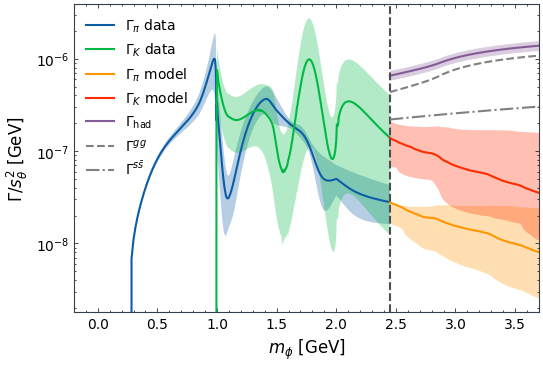

In [58]:
plot_errors_from_par_variation(m_error_fit*1e-3,all_brs,gamma_fac_opt,path='/home/henry/Documents/Uni/Masterarbeit/latex-thesis/plots/pi_K_decay_widths_with_minos_error.pdf')

In [22]:
from decay_widths import gamma_hadrons,gamma_total
def plot_br_with_minos_error2(axis,state,brs,m,label):
    m=m*1e-3
    hadronic_br=gamma_hadrons(m)/gamma_total(m)
    upper=np.array([brs[i][state]['BR upper'] for i in range(len(m))])*hadronic_br
    lower=np.array([brs[i][state]['BR lower'] for i in range(len(m))])*hadronic_br
    central=np.array([brs[i][state]['BR central'] for i in range(len(m))])*hadronic_br
    axis.plot(m,central,label=label)
    axis.fill_between(m,upper,lower,alpha=0.3)
    axis.text(0.95, 0.95, label, horizontalalignment='right', verticalalignment='top', transform=axis.transAxes)
    #axis.legend()
    axis.set_xlabel(r'$m_\phi$ [GeV]')
    axis.set_ylabel('branching ratio')

def plot_br_with_minos_error(axis, state, brs, m, label):
    m = m * 1e-3
    hadronic_br = gamma_hadrons(m) / gamma_total(m)
    
    list_of_dicts = [
        brs[i][state] if state in brs[i].keys() else {'BR upper': 0, 'BR lower': 0, 'BR central': 0}
        for i in range(len(m)) ]
    upper = np.array([d['BR upper'] for d in list_of_dicts]) * hadronic_br
    lower = np.array([d['BR lower'] for d in list_of_dicts]) * hadronic_br
    central = np.array([d['BR central'] for d in list_of_dicts]) * hadronic_br
    
    axis.plot(m, central, label=label)
    axis.fill_between(m, upper, lower, alpha=0.3)
    axis.text(0.95, 0.95, label, horizontalalignment='right', verticalalignment='top', transform=axis.transAxes)
    axis.set_xlabel(r'$m_\phi$ [GeV]',fontsize=10)
    axis.set_ylabel('branching ratio',fontsize=10)

/home/henry/Documents/Uni/Masterarbeit/code/owndecayer/decay_widths.py:174: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(1-4*x)


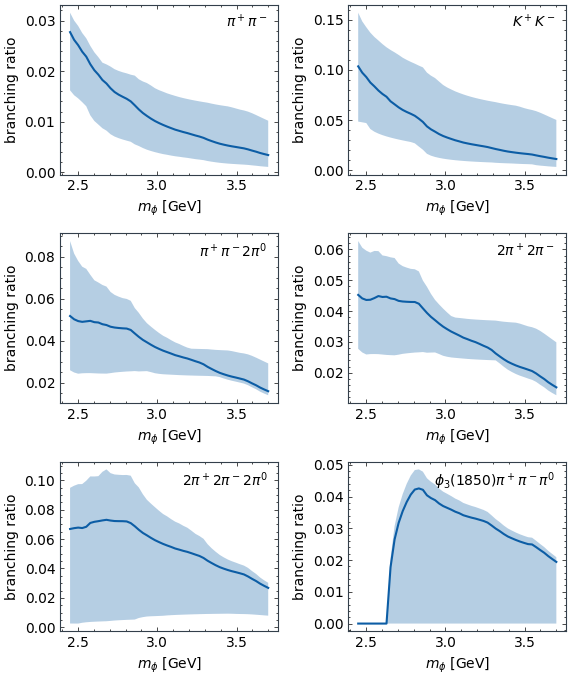

In [23]:
fig,ax=plt.subplots(3,2,figsize=(6,7))
plot_br_with_minos_error(ax[0,0],(-211,211),all_brs,m_error_fit,label=r'$\pi^+\pi^-$')
plot_br_with_minos_error(ax[0,1],(-321,321),all_brs,m_error_fit,label=r'$K^+K^-$')
plot_br_with_minos_error(ax[1,0],(-211,111,111,211),all_brs,m_error_fit,label=r'$\pi^+\pi^-2\pi^0$')
plot_br_with_minos_error(ax[1,1],(-211,-211,211,211),all_brs,m_error_fit,label=r'$2\pi^+2\pi^-$')
plot_br_with_minos_error(ax[2,0],(-211,-211,111,111,211,211),all_brs,m_error_fit,label=r'$2\pi^+2\pi^-2\pi^0$')
plot_br_with_minos_error(ax[2,1],(-211,111,211,337),all_brs,m_error_fit,label=r'$\phi_3(1850)\pi^+\pi^-\pi^0$')
plt.tight_layout()
plt.savefig('/home/henry/Documents/Uni/Masterarbeit/latex-thesis/plots/brs_with_error.pdf')

/home/henry/Documents/Uni/Masterarbeit/code/owndecayer/decay_widths.py:174: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(1-4*x)


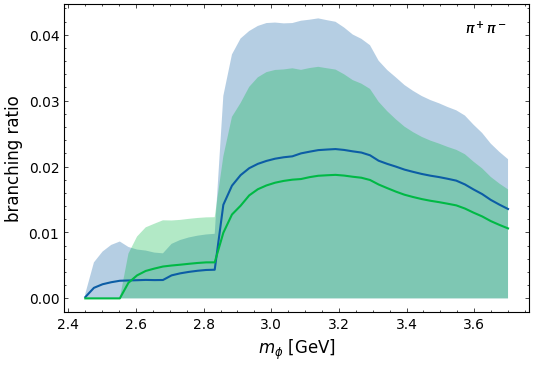

In [ ]:
#downwards kink around 2.8 is explained by many new thresholds appearing here
fig,ax=plt.subplots()
plot_br_with_minos_error(ax,(-211,111,211,227),all_brs,m_error_fit,label=r'$$')
plot_br_with_minos_error(ax,(-211,211,9010225),all_brs,m_error_fit,label=r'$$')

In [114]:
#look for thresholds
thresholds=[]
search_window=[2800,2900]
init_states=SH_best_fit2.get_initial_states()
count=0
for p1,p2 in init_states.keys():
    particle1=p.from_pdgid(p1)
    p1_mass=particle1.mass
    particle2=p.from_pdgid(p2)
    p2_mass=particle2.mass
    mass=p1_mass+p2_mass
    if mass>search_window[0] and mass<search_window[1]: 
        count+=1
        print(particle1.name,particle2.name,mass)

print(count)

f(2)(1270) eta(2)(1645) 2892.4
f(2)(1270) f(2)(1565) 2846.4
omega(3)(1670) h(1)(1170) 2833.0
K(2)*(1430)~0 K(2)*(1430)0 2864.8
K(2)*(1430)- K(2)*(1430)+ 2854.6
phi(1020) phi(3)(1850) 2873.4610000000002
a(0)(1450)0 a(0)(1450)0 2878.0
a(0)(1450)- a(0)(1450)+ 2878.0
f(0)(1370) f(0)(1500) 2872.0
h(1)(1170) omega(1650) 2836.0
eta(2)(1645) f(1)(1285) 2898.8
K(0)*(1430)~0 K(0)*(1430)0 2860.0
K(0)*(1430)- K(0)*(1430)+ 2860.0
h(1)(1415) h(1)(1415) 2818.0
a(1)(1260)0 pi(1)(1600)0 2875.0
a(1)(1260)0 a(1)(1640)0 2885.0
f(1)(1285) f(2)(1565) 2852.8
K(1)(1400)~0 K(1)(1400)0 2806.0
K(1)(1400)- K(1)(1400)+ 2806.0
f(1)(1420) f(1)(1420) 2856.8
omega(1420) omega(1420) 2820.0
K*(1410)~0 K*(1410)0 2828.0
K*(1410)- K*(1410)+ 2828.0
eta(1405) eta(1405) 2817.4
24


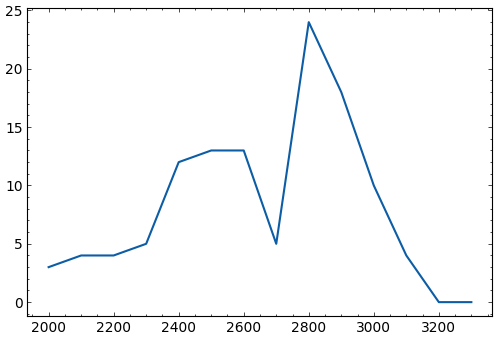

In [148]:
#24 new channels appear between 2800 and 2900 MeV
x_list=np.arange(2000,3400,100)
counts=[]
for x in x_list:
    count=0
    for p1,p2 in init_states.keys():
        particle1=p.from_pdgid(p1)
        p1_mass=particle1.mass
        particle2=p.from_pdgid(p2)
        p2_mass=particle2.mass
        mass=p1_mass+p2_mass 
        if mass>=x and mass<x+100: count+=1
    counts.append(count)

plt.plot(x_list,counts)

In [145]:
#which parameters correspnd to upper boundary of gamma_K?
i=0
for i in range(6):
    SH=ScalarHadronizer(scalar_mass=2450,strange_weight=parameters_from_minos[i][0],spin_suppression=parameters_from_minos[i][1],suppression_mode='spin',gamma_fac=parameters_from_minos[i][2])

    states=SH.make_initialMesonPairs(logging=True)
    print(states[(-321,321)]+states[(-311,311)])
    print(states[(-211,211)]+states[(111,111)])
    #print(SH.get_decay_width(states[(-321,321)]+states[(-311,311)]),gamma_ss(2.45))
#SH.print_initial_states()



0.12858618291080054
0.04488229697950966
0.30390113738886854
0.025378170511861614
0.35133776313786647
0.041895751544175686
0.08021862022524917
0.027937607181887054
0.23868699507798635
0.047750832260140895
0.19395096472783352
0.03862148870687195


In [146]:
SH=ScalarHadronizer(scalar_mass=2450,strange_weight=parameters_from_minos[i][0],spin_suppression=parameters_from_minos[i][1],suppression_mode='spin',gamma_fac=parameters_from_minos[i][2])
SH.simulateDecay()
len(SH.get_final_states())

Generated 47 initial meson pairs.


334

## suppression_mode: OAM

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 0.09822                    │              Nfcn = 280              │
│ EDM = 2.71e-05 (Goal: 0.0001)    │            time = 3.6 sec            │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│     SOME parameters at limit     │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬───────────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name      │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼───────────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ ws        │   0.32    │   0.87    │   -0.32    │    1.00    │    0    │   10    │       │
│ 1 │ wv        │ 0.024e-3  │739.830e-3 │ -0.024e-3  │ 259.549e-3 │    0    │    1    │       │
│ 2 │ gamma_fac │   1.00    │   0.11    │   -0.10    │    0.11    │    0    │   10    │       │
└───┴───────────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌──────────┬───────────────────────┬───────────────────────┬───────────────────────┐
│          │          ws           │          wv           │       gamma_fac       │
├──────────┼───────────┬───────────┼───────────┬───────────┼───────────┬───────────┤
│  Error   │   -0.32   │   1.00    │ -0.024e-3 │259.549e-3 │   -0.10   │   0.11    │
│  Valid   │   True    │   True    │   True    │   True    │   True    │   True    │
│ At Limit │   True    │   False   │   True    │   False   │   False   │   False   │
│ Max FCN  │   False   │   False   │   False   │   False   │   False   │   False   │
│ New Min  │   False   │   False   │   False   │   False   │   False   │   False   │
└──────────┴───────────┴───────────┴───────────┴───────────┴───────────┴───────────┘
┌───────────┬───────────────────────────────┐
│           │        ws        wv gamma_fac │
├───────────┼───────────────────────────────┤
│        ws │     0.837  -0.31e-3     0.019 │
│        wv │  -0.31e-3   5.6e-05         0 │
│ gamma_fac │     0.019         0    0.0111 │
└───────────┴───────────────────────────────┘

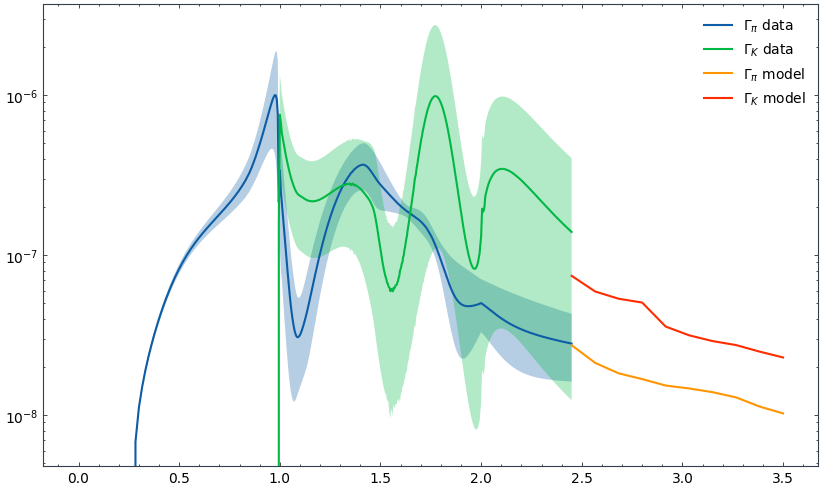

In [25]:
from scalarhadronizer import ScalarHadronizer

from iminuit import Minuit
m_fit=2450
SH_fit=ScalarHadronizer(scalar_mass=m_fit,suppression_mode='OAM')
meson_list=SH_fit.initialize_meson_list_for_parameter_fits()

def nll_minuit(ws,wv,gamma_fac):
    br_pi,br_K,gamma_pi,gamma_K=SH_fit.parameter_fit_func(ws,wv,gamma_fac,meson_list)
    return -logL_model(gamma_pi,gamma_pi_central_last,gamma_pi_upper_last,gamma_pi_lower_last)-logL_model(gamma_K,gamma_K_central_last,gamma_K_upper_last,gamma_K_lower_last)-logL_model(gamma_fac,1,gamma_had_upper/gamma_had_central,gamma_had_lower/gamma_had_central)

m = Minuit(nll_minuit, ws=1,wv=0.5,gamma_fac=1)
m.limits=[(0,10),(0,1),(0,10)]
m.errordef = Minuit.LIKELIHOOD
m.migrad()
m.hesse()
SH_fit.set_parameters(strange_weight=m.params[0].value,spin_suppression=m.params[1].value,gamma_fac=m.params[2].value,ud_weight=1,charm_weight=0,bottom_weight=0)
display(m.minos())

ws_opt_oam=m.params[0].value
wv_opt_oam=m.params[1].value
gamma_fac_opt_oam=m.params[2].value
cov_matrix_oam=np.array(m.covariance)

m_list=np.linspace(m_fit*1e-3,3.5,10)
pi_list=[]
K_list=[]
for mass in m_list:
    SH=ScalarHadronizer(scalar_mass=mass*1e3,strange_weight=ws_opt_oam,spin_suppression=wv_opt_oam,suppression_mode='OAM',gamma_fac=gamma_fac_opt_oam)
    meson_list2=SH.initialize_meson_list_for_parameter_fits()
    br_pi,br_K,gamma_pi,gamma_K=SH.parameter_fit_func(ws_opt_oam,wv_opt_oam,gamma_fac_opt_oam,meson_list2)
    pi_list.append(gamma_pi)
    K_list.append(gamma_K)
    

fig,ax=plt.subplots(figsize=(10,6))
ax.plot(pi_data[:,0],pi_data[:,1],label=r'$\Gamma_\pi$ data')
ax.fill_between(pi_data[:,0], pi_data[:,2],pi_data[:,3],alpha=0.3,interpolate=True)
ax.plot(K_data[:,0],K_data[:,1],label=r'$\Gamma_K$ data')
ax.fill_between(K_data[:,0], K_data[:,2],K_data[:,3],alpha=0.3,interpolate=True)

ax.plot(m_list,pi_list,label=r'$\Gamma_\pi$ model')
ax.plot(m_list,K_list,label=r'$\Gamma_K$ model')
ax.set_yscale('log')
plt.legend()


In [26]:
ws_upper_oam=m.merrors['ws'].upper
wv_upper_oam=m.merrors['wv'].upper
gamma_fac_upper_oam=m.merrors['gamma_fac'].upper
gamma_fac_lower_oam=abs(m.merrors['gamma_fac'].lower)
likelihood_oam=m.fval

In [27]:
parameters_from_minos_oam=[]
upper_lower_errors={'wv':[0,wv_opt_oam+wv_upper_oam],'ws':[0,ws_opt_oam+ws_upper_oam],'gamma_fac':[gamma_fac_opt_oam-gamma_fac_lower_oam,gamma_fac_opt_oam+gamma_fac_upper_oam]}
SH_err=ScalarHadronizer(scalar_mass=2450,suppression_mode='OAM')
meson_list=SH_err.initialize_meson_list_for_parameter_fits()

def nll_minuit(ws,wv,gamma_fac):
    br_pi,br_K,gamma_pi,gamma_K=SH_err.parameter_fit_func(ws,wv,gamma_fac,meson_list)
    return -logL_model(gamma_pi,gamma_pi_central_last,gamma_pi_upper_last,gamma_pi_lower_last)-logL_model(gamma_K,gamma_K_central_last,gamma_K_upper_last,gamma_K_lower_last)-logL_model(gamma_fac,1,gamma_had_upper/gamma_had_central,gamma_had_lower/gamma_had_central)

for par in ['ws','wv','gamma_fac']:
    for par_val in upper_lower_errors[par]:
        minuit_error = Minuit(nll_minuit, ws=1,wv=0.1,gamma_fac=1)
        minuit_error.limits=[(0,10),(0,1),(0,10)]
        minuit_error.errordef = Minuit.LIKELIHOOD
        minuit_error.fixto(par,par_val)
        minuit_error.migrad()
        parameters_from_minos_oam.append([minuit_error.params['ws'].value,minuit_error.params['wv'].value,minuit_error.params['gamma_fac'].value])

In [28]:
parameters_from_minos_oam

[[0.0, 0.03446081094944464, 1.0015315317073625],
 [1.3234812384703294, 2.650928983287333e-06, 1.0198540495816908],
 [0.3231451343654918, 0.0, 1.0040483746634945],
 [6.488917882836384e-11, 0.2595729312628045, 1.018649655433791],
 [0.12520512096207778, 5.844477788720528e-06, 0.8989017764333548],
 [0.49674931416337614, 1.9365813353843344e-06, 1.1091747955070086]]

In [59]:
m_error_fit=np.linspace(m_fit,3700,40)
file_path = 'pkls_for_plots/brs_with_errors_minos_oam.pkl'
if os.path.exists(file_path):
    with open(file_path, 'rb') as f:
        all_brs_oam = pickle.load(f)
else:
    all_brs_oam=[]
    for mass in m_error_fit:
        print(mass)
        brs_with_errors=compute_errors_from_par_variation(mass,parameters_from_minos_oam,optimal_values=[ws_opt_oam,wv_opt_oam,gamma_fac_opt_oam],suppression_mode='OAM')
        all_brs_oam.append(brs_with_errors)

    with open(file_path,'wb') as f:
        pickle.dump(all_brs_oam,f)

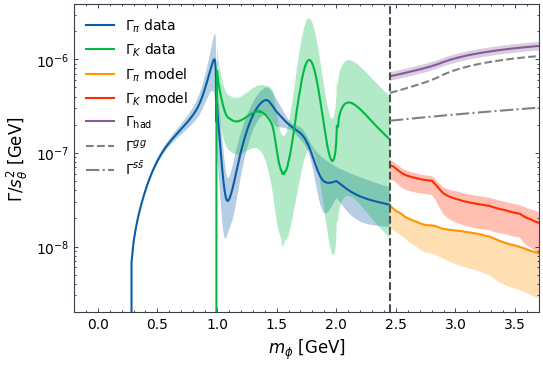

In [60]:
plot_errors_from_par_variation(m_error_fit*1e-3,all_brs_oam,gamma_fac_opt_oam,path='/home/henry/Documents/Uni/Masterarbeit/latex-thesis/plots/pi_K_decay_widths_with_minos_error_oam.pdf')

/home/henry/Documents/Uni/Masterarbeit/code/owndecayer/decay_widths.py:174: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(1-4*x)


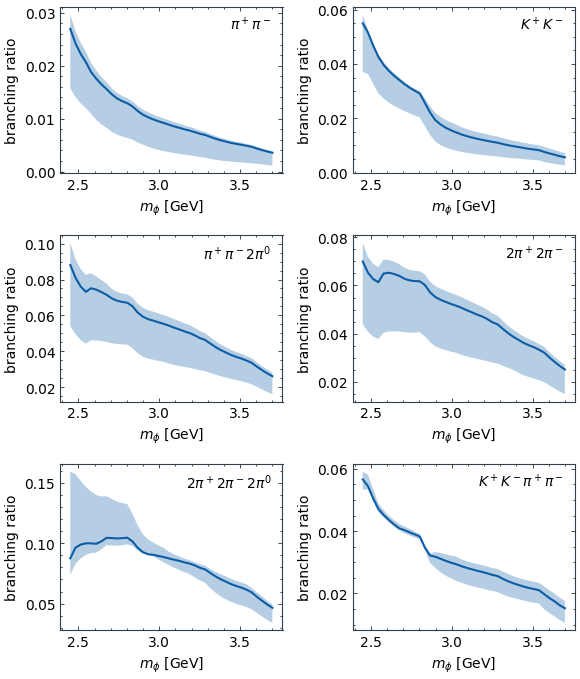

In [33]:
fig,ax=plt.subplots(3,2,figsize=(6,7))
plot_br_with_minos_error(ax[0,0],(-211,211),all_brs_oam,m_error_fit,label=r'$\pi^+\pi^-$')
plot_br_with_minos_error(ax[0,1],(-321,321),all_brs_oam,m_error_fit,label=r'$K^+K^-$')
plot_br_with_minos_error(ax[1,0],(-211,111,111,211),all_brs_oam,m_error_fit,label=r'$\pi^+\pi^-2\pi^0$')
plot_br_with_minos_error(ax[1,1],(-211,-211,211,211),all_brs_oam,m_error_fit,label=r'$2\pi^+2\pi^-$')
plot_br_with_minos_error(ax[2,0],(-211,-211,111,111,211,211),all_brs_oam,m_error_fit,label=r'$2\pi^+2\pi^-2\pi^0$')
plot_br_with_minos_error(ax[2,1],(-321,-211,211,321),all_brs_oam,m_error_fit,label=r'$K^+K^-\pi^+\pi^-$')
plt.tight_layout()
plt.savefig('/home/henry/Documents/Uni/Masterarbeit/latex-thesis/plots/brs_with_error_oam.pdf')

2450 0.3215651041833419 2.362475389006843e-05 1.0035785083654511
Generated 31 initial meson pairs.
Generated 79 initial meson pairs.


(<Figure size 400x500 with 1 Axes>, <Axes: xlabel='branching ratio'>)

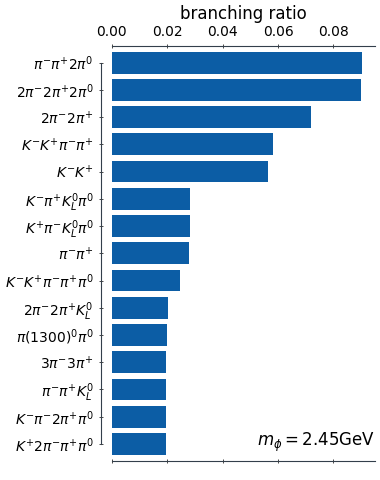

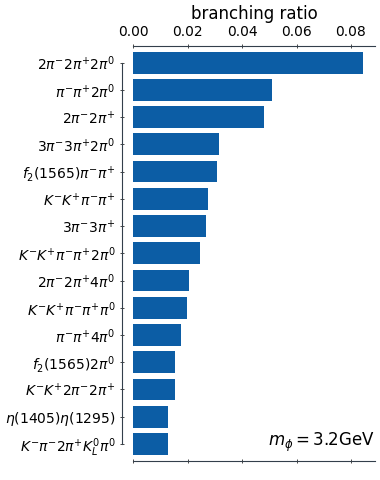

In [46]:
print(m_fit,ws_opt_oam,wv_opt_oam,gamma_fac_opt_oam)
SH_best_fit=ScalarHadronizer(scalar_mass=m_fit,strange_weight=ws_opt_oam,spin_suppression=wv_opt_oam,gamma_fac=gamma_fac_opt_oam,suppression_mode='OAM')
SH_best_fit.simulateDecay()
SH_best_fit.plot_final_state_hist(show=False,n=15,save_path='/home/henry/Documents/Uni/Masterarbeit/latex-thesis/plots/final_state_hist1_oam.pdf')
SH_best_fit2=ScalarHadronizer(scalar_mass=3200,strange_weight=ws_opt_oam,spin_suppression=wv_opt_oam,gamma_fac=gamma_fac_opt_oam,suppression_mode='OAM')
SH_best_fit2.simulateDecay()
SH_best_fit2.plot_final_state_hist(show=False,n=15,save_path='/home/henry/Documents/Uni/Masterarbeit/latex-thesis/plots/final_state_hist2_oam.pdf')


(<Figure size 400x500 with 1 Axes>, <Axes: xlabel='branching ratio'>)

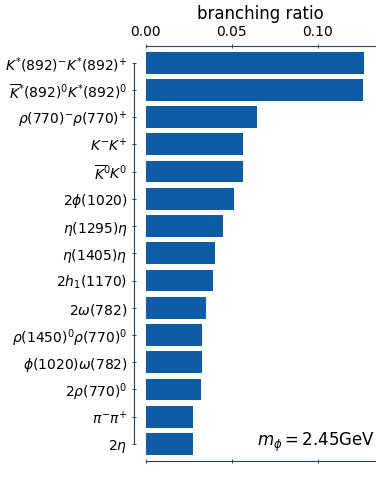

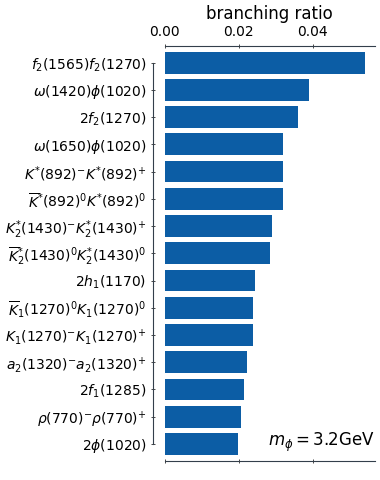

In [36]:
SH_best_fit.plot_initial_state_hist(n=15,show=False,save_path='/home/henry/Documents/Uni/Masterarbeit/latex-thesis/plots/initial_state_hist1_oam.pdf')
SH_best_fit2.plot_initial_state_hist(n=15,show=False,save_path='/home/henry/Documents/Uni/Masterarbeit/latex-thesis/plots/initial_state_hist2_oam.pdf')

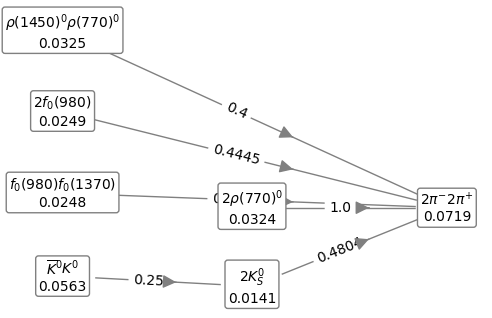

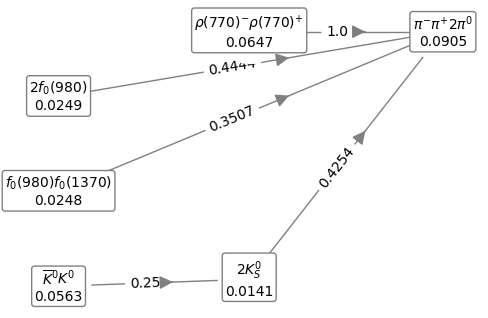

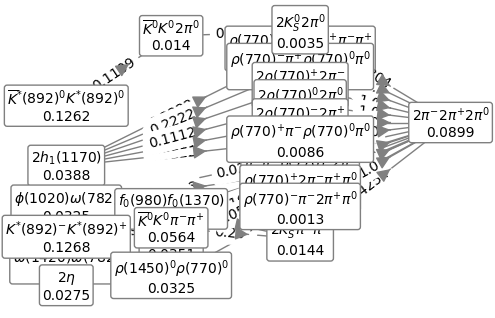

In [47]:
SH_best_fit.plot_from_final_state((-211,-211,211,211))
SH_best_fit.plot_from_final_state((-211,111,111,211))
SH_best_fit.plot_from_final_state((-211,-211,111,111,211,211))

In [37]:
results_dict['ws_oam']=ws_opt_oam
results_dict['av_oam']=wv_opt_oam
results_dict['a_gamma_oam']=gamma_fac_opt_oam
results_dict['likelihood_oam']=likelihood_oam

results_dict['ws_upper_oam']=ws_upper_oam
results_dict['av_upper_oam']=wv_upper_oam
results_dict['a_gamma_upper_oam']=gamma_fac_upper_oam
results_dict['a_gamma_lower_oam']=gamma_fac_lower_oam
for i in [1,2,3]:
    for j in [1,2,3]:
        name='c_oam'+str(i)+str(j)
        results_dict[name]=cov_matrix_oam[i-1,j-1]

#write_result_to_file(results_dict)

## fix wv=1

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 2.153                      │              Nfcn = 98               │
│ EDM = 2.16e-06 (Goal: 0.0001)    │            time = 1.3 sec            │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│     SOME parameters at limit     │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬───────────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name      │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼───────────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ ws        │  1.3e-6   │857580.4e-6│  -1.3e-6   │739317.5e-6 │    0    │   10    │       │
│ 1 │ wv        │   1.000   │   0.005   │            │            │    0    │    1    │  yes  │
│ 2 │ gamma_fac │   1.03    │   0.12    │   -0.12    │    0.12    │    0    │   10    │       │
└───┴───────────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌──────────┬───────────────────────┬───────────────────────┐
│          │          ws           │       gamma_fac       │
├──────────┼───────────┬───────────┼───────────┬───────────┤
│  Error   │  -1.3e-6  │739317.5e-6│   -0.12   │   0.12    │
│  Valid   │   True    │   True    │   True    │   True    │
│ At Limit │   True    │   False   │   False   │   False   │
│ Max FCN  │   False   │   False   │   False   │   False   │
│ New Min  │   False   │   False   │   False   │   False   │
└──────────┴───────────┴───────────┴───────────┴───────────┘
┌───────────┬───────────────────────────────┐
│           │        ws        wv gamma_fac │
├───────────┼───────────────────────────────┤
│        ws │   4.6e-06      0e-6     -0e-6 │
│        wv │      0e-6         0     0.000 │
│ gamma_fac │     -0e-6     0.000    0.0144 │
└───────────┴───────────────────────────────┘

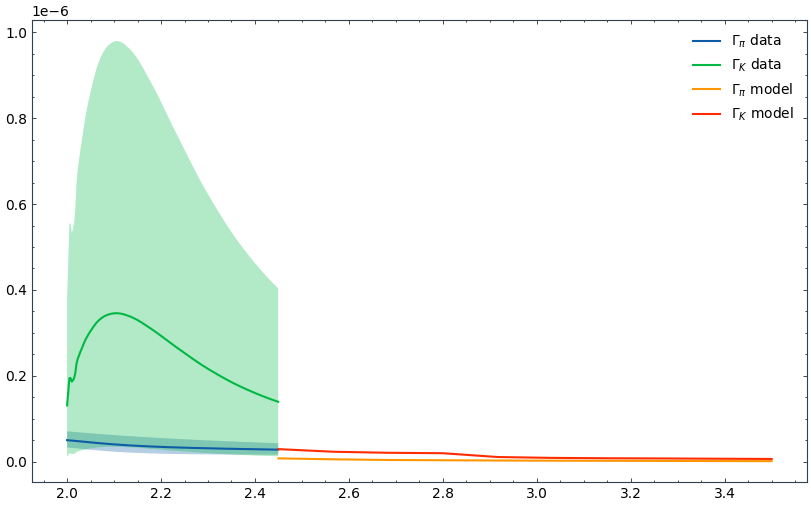

In [93]:
m_fit=2450
SH_fit=ScalarHadronizer(scalar_mass=m_fit,suppression_mode='spin')
meson_list=SH_fit.initialize_meson_list_for_parameter_fits()

def nll_minuit(ws,wv,gamma_fac):
    br_pi,br_K,gamma_pi,gamma_K=SH_fit.parameter_fit_func(ws,wv,gamma_fac,meson_list)
    return -logL_model(gamma_pi,gamma_pi_central_last,gamma_pi_upper_last,gamma_pi_lower_last)-logL_model(gamma_K,gamma_K_central_last,gamma_K_upper_last,gamma_K_lower_last)-logL_model(gamma_fac,1,gamma_had_upper/gamma_had_central,gamma_had_lower/gamma_had_central)
m = Minuit(nll_minuit, ws=1,wv=0.5,gamma_fac=0.8)
m.limits=[(0,10),(0,1),(0,10)]
m.errordef = Minuit.LIKELIHOOD
m.fixto('wv',1)
m.migrad()
m.hesse()
SH_fit.set_parameters(strange_weight=m.params[0].value,spin_suppression=m.params[1].value,gamma_fac=m.params[2].value,ud_weight=1,charm_weight=0,bottom_weight=0)
display(m.minos())

ws_opt_fixed_wv=m.params[0].value
wv_opt_fixed_wv=m.params[1].value
gamma_fac_opt_fixed_wv=m.params[2].value
cov_matrix2=np.array(m.covariance)

ws_upper_fixed_wv=m.merrors['ws'].upper
gamma_fac_upper_fixed_wv=m.merrors['gamma_fac'].upper
gamma_fac_lower_fixed_wv=abs(m.merrors['gamma_fac'].lower)

m_list=np.linspace(m_fit*1e-3,3.5,10)
pi_list=[]
K_list=[]
for mass in m_list:
    SH=ScalarHadronizer(scalar_mass=mass*1e3,strange_weight=ws_opt_fixed_wv,spin_suppression=wv_opt_fixed_wv,suppression_mode='spin',gamma_fac=gamma_fac_opt_fixed_wv)
    meson_list2=SH.initialize_meson_list_for_parameter_fits()
    br_pi,br_K,gamma_pi,gamma_K=SH.parameter_fit_func(ws_opt_fixed_wv,wv_opt_fixed_wv,gamma_fac_opt_fixed_wv,meson_list2)
    pi_list.append(gamma_pi)
    K_list.append(gamma_K)
    

fig,ax=plt.subplots(figsize=(10,6))
c=400
ax.plot(pi_data[c:,0],pi_data[c:,1],label=r'$\Gamma_\pi$ data')
ax.fill_between(pi_data[c:,0], pi_data[c:,2],pi_data[c:,3],alpha=0.3,interpolate=True)
ax.plot(K_data[c:,0],K_data[c:,1],label=r'$\Gamma_K$ data')
ax.fill_between(K_data[c:,0], K_data[c:,2],K_data[c:,3],alpha=0.3,interpolate=True)

ax.plot(m_list,pi_list,label=r'$\Gamma_\pi$ model')
ax.plot(m_list,K_list,label=r'$\Gamma_K$ model')
#ax.set_yscale('log')
plt.legend()

In [ ]:
likelihood_fixed_wv=m.fval
results_dict['ws_fixed']=ws_opt_fixed_wv
results_dict['a_gamma_fixed']=gamma_fac_opt_fixed_wv
results_dict['likelihood_fixed']=likelihood_fixed_wv

results_dict['ws_upper_fixed']=ws_upper_fixed_wv
results_dict['a_gamma_upper_fixed']=gamma_fac_upper_fixed_wv
results_dict['a_gamma_lower_fixed']=gamma_fac_lower_fixed_wv

write_result_to_file(results_dict)

Generated 40 initial meson pairs.


(<Figure size 400x500 with 1 Axes>, <Axes: xlabel='branching ratio'>)

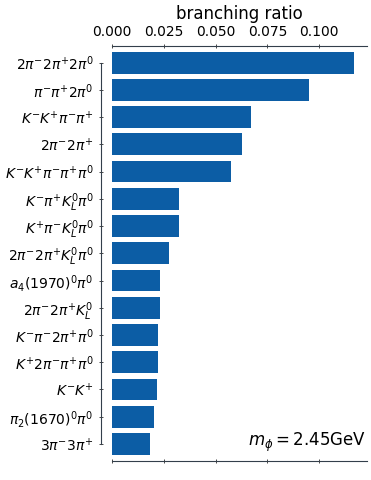

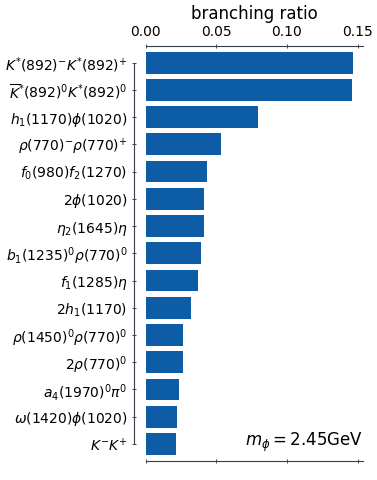

In [40]:
SH_best_fit=ScalarHadronizer(scalar_mass=m_fit,strange_weight=ws_opt_fixed_wv,spin_suppression=wv_opt_fixed_wv,gamma_fac=gamma_fac_opt_fixed_wv)
SH_best_fit.simulateDecay()
SH_best_fit.plot_final_state_hist(show=False,n=15,save_path='/home/henry/Documents/Uni/Masterarbeit/latex-thesis/plots/final_state_hist1_fixed_wv.pdf')
SH_best_fit.plot_initial_state_hist(n=15,show=False,save_path='/home/henry/Documents/Uni/Masterarbeit/latex-thesis/plots/initial_state_hist1_fixed_wv.pdf')

In [46]:
fs=SH_best_fit.get_final_states()
print(fs[(-321,321)])
print(fs[(-211,211)])

0.02174097897361282
0.01208383770654131


### minos errors

In [ ]:
parameters_from_minos_fixed_wv=[]
upper_lower_errors={'ws':[0,ws_opt_fixed_wv+ws_upper_fixed_wv],'gamma_fac':[gamma_fac_opt_fixed_wv-gamma_fac_lower_fixed_wv,gamma_fac_opt_fixed_wv+gamma_fac_upper_fixed_wv]}
SH_err=ScalarHadronizer(scalar_mass=2450)
meson_list=SH_err.initialize_meson_list_for_parameter_fits()
def nll_minuit(ws,wv,gamma_fac):
    br_pi,br_K,gamma_pi,gamma_K=SH_fit.parameter_fit_func(ws,wv,gamma_fac,meson_list)
    return -logL_model(gamma_pi,gamma_pi_central_last,gamma_pi_upper_last,gamma_pi_lower_last)-logL_model(gamma_K,gamma_K_central_last,gamma_K_upper_last,gamma_K_lower_last)-logL_model(gamma_fac,1,gamma_had_upper/gamma_had_central,gamma_had_lower/gamma_had_central)

for par in ['ws','gamma_fac']:
    for par_val in upper_lower_errors[par]:
        minuit_error = Minuit(nll_minuit, ws=1,wv=0.1,gamma_fac=1)
        minuit_error.limits=[(0,10),(0,1),(0,10)]
        minuit_error.errordef = Minuit.LIKELIHOOD
        minuit_error.fixto(par,par_val)
        minuit_error.fixto('wv',1)
        minuit_error.migrad()
        parameters_from_minos_fixed_wv.append([minuit_error.params['ws'].value,minuit_error.params['wv'].value,minuit_error.params['gamma_fac'].value])
    
parameters_from_minos_fixed_wv

[[0.0, 1.0, 1.0274144238516882],
 [0.7393187697773881, 1.0, 1.023964358015155],
 [1.5516975504931965e-07, 1.0, 0.9067401472417467],
 [6.544677326801129e-06, 1.0, 1.1471448197701788]]

In [95]:
m_error_fit=np.linspace(m_fit,3700,40)
file_path = 'pkls_for_plots/brs_with_errors_minos_fixedwv.pkl'
if os.path.exists(file_path):
    with open(file_path, 'rb') as f:
        all_brs = pickle.load(f)
else:
    all_brs=[]
    for mass in m_error_fit:
        print(mass)
        brs_with_errors=compute_errors_from_par_variation(mass,parameters_from_minos_fixed_wv,optimal_values=[ws_opt_fixed_wv,wv_opt_fixed_wv,gamma_fac_opt_fixed_wv])
        all_brs.append(brs_with_errors)

    with open(file_path,'wb') as f:
        pickle.dump(all_brs,f)

2450.0
Generated 49 initial meson pairs.
2482.051282051282
Generated 56 initial meson pairs.
2514.102564102564
Generated 61 initial meson pairs.
2546.153846153846
Generated 62 initial meson pairs.
2578.2051282051284
Generated 72 initial meson pairs.
2610.25641025641
Generated 75 initial meson pairs.
2642.3076923076924
Generated 80 initial meson pairs.
2674.3589743589746
Generated 80 initial meson pairs.
2706.4102564102564
Generated 89 initial meson pairs.
2738.4615384615386
Generated 92 initial meson pairs.
2770.5128205128203
Generated 95 initial meson pairs.
2802.5641025641025
Generated 99 initial meson pairs.
2834.6153846153848
Generated 108 initial meson pairs.
2866.6666666666665
Generated 118 initial meson pairs.
2898.7179487179487
Generated 127 initial meson pairs.
2930.769230769231
Generated 136 initial meson pairs.
2962.8205128205127
Generated 142 initial meson pairs.
2994.871794871795
Generated 148 initial meson pairs.
3026.923076923077
Generated 155 initial meson pairs.
3058.9

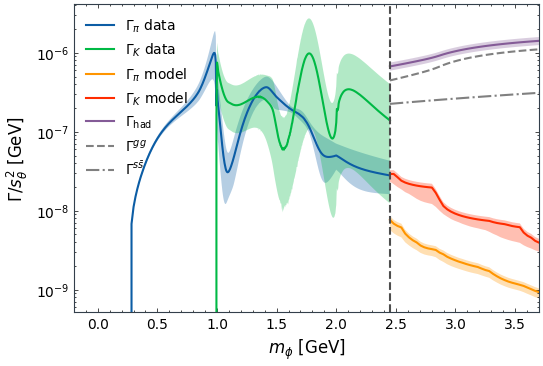

In [96]:
plot_errors_from_par_variation(m_error_fit*1e-3,all_brs,gamma_fac_opt_fixed_wv,path='/home/henry/Documents/Uni/Masterarbeit/latex-thesis/plots/pi_K_decay_widths_fixed_av.pdf')

In [97]:
SH_best_fit=ScalarHadronizer(scalar_mass=m_fit,strange_weight=ws_opt_fixed_wv,spin_suppression=wv_opt_fixed_wv,gamma_fac=gamma_fac_opt_fixed_wv)
SH_best_fit.simulateDecay()
fs=SH_best_fit.get_final_states()
print(fs[(-321,321)],fs[(-211,211)])

Generated 40 initial meson pairs.
0.02172577967392295 0.007593008605633837


# cut at 2gev

In [69]:
from decay_widths import gamma_gg,gamma_ss
m_fit=2000
m_fit_gev=m_fit*1e-3
gamma_had_central=gamma_gg(m_fit_gev)+gamma_ss(m_fit_gev)
gamma_had_err=np.abs(gamma_had_central-gamma_gg(m_fit_gev,mu=2*m_fit_gev)-gamma_ss(m_fit_gev,mu=2*m_fit_gev))
gamma_had_upper=gamma_had_central+gamma_had_err
gamma_had_lower=gamma_had_central-gamma_had_err
print(gamma_had_central,gamma_had_err)

4.990619940976443e-07 6.047007475293422e-08


## spin

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 1.656e-05                  │              Nfcn = 286              │
│ EDM = 1.64e-05 (Goal: 0.0001)    │            time = 2.4 sec            │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│     SOME parameters at limit     │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬───────────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name      │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼───────────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ ws        │   0.30    │   1.36    │   -0.30    │    1.64    │    0    │   10    │       │
│ 1 │ wv        │   0.13    │   0.26    │   -0.14    │    0.31    │    0    │    1    │       │
│ 2 │ gamma_fac │   1.00    │   0.12    │   -0.12    │    0.12    │    0    │   10    │       │
└───┴───────────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌──────────┬───────────────────────┬───────────────────────┬───────────────────────┐
│          │          ws           │          wv           │       gamma_fac       │
├──────────┼───────────┬───────────┼───────────┬───────────┼───────────┬───────────┤
│  Error   │   -0.30   │   1.64    │   -0.14   │   0.31    │   -0.12   │   0.12    │
│  Valid   │   True    │   True    │   True    │   True    │   True    │   True    │
│ At Limit │   True    │   False   │   True    │   False   │   False   │   False   │
│ Max FCN  │   False   │   False   │   False   │   False   │   False   │   False   │
│ New Min  │   False   │   False   │   False   │   False   │   False   │   False   │
└──────────┴───────────┴───────────┴───────────┴───────────┴───────────┴───────────┘
┌───────────┬───────────────────────────────┐
│           │        ws        wv gamma_fac │
├───────────┼───────────────────────────────┤
│        ws │       1.8     -0.35     0.003 │
│        wv │     -0.35    0.0907     0.005 │
│ gamma_fac │     0.003     0.005    0.0147 │
└───────────┴───────────────────────────────┘

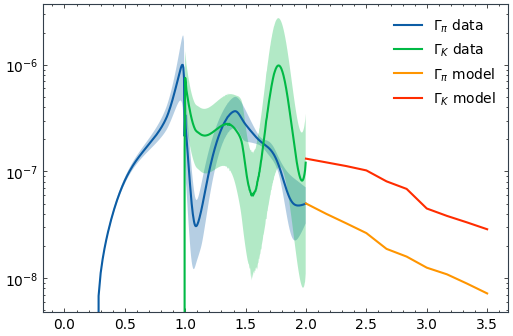

In [71]:
from scalarhadronizer import ScalarHadronizer

from iminuit import Minuit
m_fit=2000
SH_fit=ScalarHadronizer(scalar_mass=m_fit,suppression_mode='spin')
meson_list=SH_fit.initialize_meson_list_for_parameter_fits()

def nll_minuit(ws,wv,gamma_fac):
    br_pi,br_K,gamma_pi,gamma_K=SH_fit.parameter_fit_func(ws,wv,gamma_fac,meson_list)
    return -logL_model(gamma_pi,gamma_pi_central,gamma_pi_upper,gamma_pi_lower)-logL_model(gamma_K,gamma_K_central,gamma_K_upper,gamma_K_lower)-logL_model(gamma_fac,1,gamma_had_upper/gamma_had_central,gamma_had_lower/gamma_had_central)

m = Minuit(nll_minuit, ws=1,wv=0.5,gamma_fac=1)
m.limits=[(0,10),(0,1),(0,10)]
m.errordef = Minuit.LIKELIHOOD
m.migrad()
m.hesse()
SH_fit.set_parameters(strange_weight=m.params[0].value,spin_suppression=m.params[1].value,gamma_fac=m.params[2].value,ud_weight=1,charm_weight=0,bottom_weight=0)
display(m.minos())

ws_opt_at2=m.params[0].value
wv_opt_at2=m.params[1].value
gamma_fac_opt_at2=m.params[2].value
ws_upper_at2=m.merrors['ws'].upper
wv_upper_at2=m.merrors['wv'].upper
gamma_fac_upper_at2=m.merrors['gamma_fac'].upper
gamma_fac_lower_at2=abs(m.merrors['gamma_fac'].lower)

m_list=np.linspace(m_fit*1e-3,3.5,10)
pi_list=[]
K_list=[]
for mass in m_list:
    SH=ScalarHadronizer(scalar_mass=mass*1e3,strange_weight=ws_opt_at2,spin_suppression=wv_opt_at2,suppression_mode='spin',gamma_fac=gamma_fac_opt_at2)
    meson_list2=SH.initialize_meson_list_for_parameter_fits()
    br_pi,br_K,gamma_pi,gamma_K=SH.parameter_fit_func(ws_opt_at2,wv_opt_at2,gamma_fac_opt_at2,meson_list2)
    pi_list.append(gamma_pi)
    K_list.append(gamma_K)
    

fig,ax=plt.subplots(figsize=(6,4))
cutoff_ind=400
ax.plot(pi_data[:cutoff_ind,0],pi_data[:cutoff_ind,1],label=r'$\Gamma_\pi$ data')
ax.fill_between(pi_data[:cutoff_ind,0], pi_data[:cutoff_ind,2],pi_data[:cutoff_ind,3],alpha=0.3,interpolate=True)
ax.plot(K_data[:cutoff_ind,0],K_data[:cutoff_ind,1],label=r'$\Gamma_K$ data')
ax.fill_between(K_data[:cutoff_ind,0], K_data[:cutoff_ind,2],K_data[:cutoff_ind,3],alpha=0.3,interpolate=True)

ax.plot(m_list,pi_list,label=r'$\Gamma_\pi$ model')
ax.plot(m_list,K_list,label=r'$\Gamma_K$ model')
ax.set_yscale('log')
plt.legend()
#plt.savefig('/home/henry/Documents/Uni/Masterarbeit/pi_K_decay_widths_at2.pdf')

In [72]:
print(ws_opt_at2,wv_opt_at2,gamma_fac_opt_at2)
print(ws_upper_at2,wv_upper_at2,gamma_fac_upper_at2,gamma_fac_lower_at2)

0.30488179504217516 0.1345551750747057 1.00031040736645
1.6440530650949676 0.3059165012554396 0.12085939497566502 0.12148069074758114


In [74]:
parameters_from_minos_at2=[]
upper_lower_errors={'wv':[0,wv_opt_at2+wv_upper_at2],'ws':[0,ws_opt_at2+ws_upper_at2],'gamma_fac':[gamma_fac_opt_at2-gamma_fac_lower_at2,gamma_fac_opt_at2+gamma_fac_upper_at2]}
SH_err=ScalarHadronizer(scalar_mass=2000)
meson_list=SH_err.initialize_meson_list_for_parameter_fits()
def nll_minuit(ws,wv,gamma_fac):
    br_pi,br_K,gamma_pi,gamma_K=SH_fit.parameter_fit_func(ws,wv,gamma_fac,meson_list)
    return -logL_model(gamma_pi,gamma_pi_central,gamma_pi_upper,gamma_pi_lower)-logL_model(gamma_K,gamma_K_central,gamma_K_upper,gamma_K_lower)-logL_model(gamma_fac,1,gamma_had_upper/gamma_had_central,gamma_had_lower/gamma_had_central)

for par in ['ws','wv','gamma_fac']:
    for par_val in upper_lower_errors[par]:
        minuit_error = Minuit(nll_minuit, ws=1,wv=0.1,gamma_fac=1)
        minuit_error.limits=[(0,10),(0,1),(0,10)]
        minuit_error.errordef = Minuit.LIKELIHOOD
        minuit_error.fixto(par,par_val)
        minuit_error.migrad()
        parameters_from_minos_at2.append([minuit_error.params['ws'].value,minuit_error.params['wv'].value,minuit_error.params['gamma_fac'].value])
    
parameters_from_minos_at2

[[0.0, 0.20178715680141732, 0.9997697661124002],
 [1.9489348601371428, 9.176347252811448e-06, 1.0160426272085543],
 [1.1164062259833971, 0.0, 0.9899907344347069],
 [7.548504422482804e-06, 0.44047167633014533, 1.0304931083479596],
 [0.2714696298024281, 0.09187741926352373, 0.8788297166188688],
 [0.3212576235102996, 0.17943113450906556, 1.121169802342115]]

In [76]:
m_error_fit=np.linspace(2000,3700,40)
file_path = 'pkls_for_plots/brs_with_errors_minos_at2_spin.pkl'
all_brs_at2_spin=[]
if os.path.exists(file_path):
    with open(file_path, 'rb') as f:
        all_brs_at2_spin = pickle.load(f)
else:
    for mass in m_error_fit:
        print(mass)
        brs_with_errors=compute_errors_from_par_variation(mass,parameters_from_minos_at2,optimal_values=[ws_opt_at2,wv_opt_at2,gamma_fac_opt_at2],suppression_mode='spin')
        all_brs_at2_spin.append(brs_with_errors)

    with open(file_path,'wb') as f:
        pickle.dump(all_brs_at2_spin,f)

2000.0
Generated 26 initial meson pairs.
2043.5897435897436
Generated 29 initial meson pairs.
2087.1794871794873
Generated 29 initial meson pairs.
2130.769230769231
Generated 30 initial meson pairs.
2174.3589743589746
Generated 31 initial meson pairs.
2217.948717948718
Generated 34 initial meson pairs.
2261.5384615384614
Generated 37 initial meson pairs.
2305.128205128205
Generated 39 initial meson pairs.
2348.7179487179487
Generated 41 initial meson pairs.
2392.3076923076924
Generated 44 initial meson pairs.
2435.897435897436
Generated 48 initial meson pairs.
2479.4871794871797
Generated 56 initial meson pairs.
2523.076923076923
Generated 61 initial meson pairs.
2566.666666666667
Generated 68 initial meson pairs.
2610.25641025641
Generated 75 initial meson pairs.
2653.846153846154
Generated 80 initial meson pairs.
2697.4358974358975
Generated 85 initial meson pairs.
2741.025641025641
Generated 92 initial meson pairs.
2784.6153846153848
Generated 95 initial meson pairs.
2828.2051282051

## oam

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 0.06486                    │              Nfcn = 294              │
│ EDM = 6.95e-06 (Goal: 0.0001)    │            time = 2.9 sec            │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│     SOME parameters at limit     │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬───────────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name      │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼───────────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ ws        │   0.11    │   0.53    │   -0.10    │    0.54    │    0    │   10    │       │
│ 1 │ wv        │ 0.010e-3  │830.688e-3 │ -0.010e-3  │ 321.972e-3 │    0    │    1    │       │
│ 2 │ gamma_fac │   1.01    │   0.12    │   -0.12    │    0.12    │    0    │   10    │       │
└───┴───────────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌──────────┬───────────────────────┬───────────────────────┬───────────────────────┐
│          │          ws           │          wv           │       gamma_fac       │
├──────────┼───────────┬───────────┼───────────┬───────────┼───────────┬───────────┤
│  Error   │   -0.10   │   0.54    │ -0.010e-3 │321.972e-3 │   -0.12   │   0.12    │
│  Valid   │   True    │   True    │   True    │   True    │   True    │   True    │
│ At Limit │   True    │   False   │   True    │   False   │   False   │   False   │
│ Max FCN  │   False   │   False   │   False   │   False   │   False   │   False   │
│ New Min  │   False   │   False   │   False   │   False   │   False   │   False   │
└──────────┴───────────┴───────────┴───────────┴───────────┴───────────┴───────────┘
┌───────────┬───────────────────────────────┐
│           │        ws        wv gamma_fac │
├───────────┼───────────────────────────────┤
│        ws │     0.229  -0.07e-3     0.016 │
│        wv │  -0.07e-3  3.64e-05         0 │
│ gamma_fac │     0.016         0    0.0143 │
└───────────┴───────────────────────────────┘

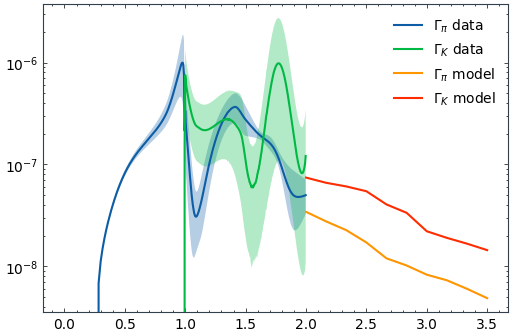

In [77]:
from scalarhadronizer import ScalarHadronizer

from iminuit import Minuit
m_fit=2000
SH_fit=ScalarHadronizer(scalar_mass=m_fit,suppression_mode='OAM')
meson_list=SH_fit.initialize_meson_list_for_parameter_fits()

def nll_minuit(ws,wv,gamma_fac):
    br_pi,br_K,gamma_pi,gamma_K=SH_fit.parameter_fit_func(ws,wv,gamma_fac,meson_list)
    return -logL_model(gamma_pi,gamma_pi_central,gamma_pi_upper,gamma_pi_lower)-logL_model(gamma_K,gamma_K_central,gamma_K_upper,gamma_K_lower)-logL_model(gamma_fac,1,gamma_had_upper/gamma_had_central,gamma_had_lower/gamma_had_central)

m = Minuit(nll_minuit, ws=1,wv=0.5,gamma_fac=1)
m.limits=[(0,10),(0,1),(0,10)]
m.errordef = Minuit.LIKELIHOOD
m.migrad()
m.hesse()
SH_fit.set_parameters(strange_weight=m.params[0].value,spin_suppression=m.params[1].value,gamma_fac=m.params[2].value,ud_weight=1,charm_weight=0,bottom_weight=0)
display(m.minos())

ws_opt_at2_oam=m.params[0].value
wv_opt_at2_oam=m.params[1].value
gamma_fac_opt_at2_oam=m.params[2].value
ws_upper_at2_oam=m.merrors['ws'].upper
wv_upper_at2_oam=m.merrors['wv'].upper
gamma_fac_upper_at2_oam=m.merrors['gamma_fac'].upper
gamma_fac_lower_at2_oam=abs(m.merrors['gamma_fac'].lower)

m_list=np.linspace(m_fit*1e-3,3.5,10)
pi_list=[]
K_list=[]
for mass in m_list:
    SH=ScalarHadronizer(scalar_mass=mass*1e3,strange_weight=ws_opt_at2,spin_suppression=wv_opt_at2,suppression_mode='OAM',gamma_fac=gamma_fac_opt_at2)
    meson_list2=SH.initialize_meson_list_for_parameter_fits()
    br_pi,br_K,gamma_pi,gamma_K=SH.parameter_fit_func(ws_opt_at2,wv_opt_at2,gamma_fac_opt_at2,meson_list2)
    pi_list.append(gamma_pi)
    K_list.append(gamma_K)
    

fig,ax=plt.subplots(figsize=(6,4))
cutoff_ind=400
ax.plot(pi_data[:cutoff_ind,0],pi_data[:cutoff_ind,1],label=r'$\Gamma_\pi$ data')
ax.fill_between(pi_data[:cutoff_ind,0], pi_data[:cutoff_ind,2],pi_data[:cutoff_ind,3],alpha=0.3,interpolate=True)
ax.plot(K_data[:cutoff_ind,0],K_data[:cutoff_ind,1],label=r'$\Gamma_K$ data')
ax.fill_between(K_data[:cutoff_ind,0], K_data[:cutoff_ind,2],K_data[:cutoff_ind,3],alpha=0.3,interpolate=True)

ax.plot(m_list,pi_list,label=r'$\Gamma_\pi$ model')
ax.plot(m_list,K_list,label=r'$\Gamma_K$ model')
ax.set_yscale('log')
plt.legend()
#plt.savefig('/home/henry/Documents/Uni/Masterarbeit/pi_K_decay_widths_at2.pdf')

In [78]:
parameters_from_minos_at2_oam=[]
upper_lower_errors={'wv':[0,wv_opt_at2_oam+wv_upper_at2_oam],'ws':[0,ws_opt_at2_oam+ws_upper_at2_oam],'gamma_fac':[gamma_fac_opt_at2_oam-gamma_fac_lower_at2_oam,gamma_fac_opt_at2_oam+gamma_fac_upper_at2_oam]}
SH_err=ScalarHadronizer(scalar_mass=2000,suppression_mode='OAM')
meson_list=SH_err.initialize_meson_list_for_parameter_fits()
def nll_minuit(ws,wv,gamma_fac):
    br_pi,br_K,gamma_pi,gamma_K=SH_fit.parameter_fit_func(ws,wv,gamma_fac,meson_list)
    return -logL_model(gamma_pi,gamma_pi_central,gamma_pi_upper,gamma_pi_lower)-logL_model(gamma_K,gamma_K_central,gamma_K_upper,gamma_K_lower)-logL_model(gamma_fac,1,gamma_had_upper/gamma_had_central,gamma_had_lower/gamma_had_central)

for par in ['ws','wv','gamma_fac']:
    for par_val in upper_lower_errors[par]:
        minuit_error = Minuit(nll_minuit, ws=1,wv=0.1,gamma_fac=1)
        minuit_error.limits=[(0,10),(0,1),(0,10)]
        minuit_error.errordef = Minuit.LIKELIHOOD
        minuit_error.fixto(par,par_val)
        minuit_error.migrad()
        parameters_from_minos_at2_oam.append([minuit_error.params['ws'].value,minuit_error.params['wv'].value,minuit_error.params['gamma_fac'].value])
    
parameters_from_minos_at2_oam

[[0.0, 0.01855813616628009, 1.0012755401511235],
 [0.6464952266314109, 1.3232204806965398e-08, 1.032671557189817],
 [0.10237382297072119, 0.0, 1.0056458039687959],
 [4.918816593727122e-10, 0.32198204443268524, 1.0311843362211623],
 [0.00011521478058784549, 3.5421098684208265e-07, 0.8865121174137621],
 [0.23434026070899613, 4.1414911924454956e-05, 1.1255703811997906]]

In [85]:
len(m_error_fit)

40

In [83]:
m_error_fit=np.linspace(2000,3700,40)
file_path = 'pkls_for_plots/brs_with_errors_minos_at2_oam.pkl'
if os.path.exists(file_path):
    with open(file_path, 'rb') as f:
        all_brs_at2_oam = pickle.load(f)
else:
    all_brs_at2_oam=[]
    for mass in m_error_fit:
        print(mass)
        brs_with_errors=compute_errors_from_par_variation(mass,parameters_from_minos_at2_oam,optimal_values=[ws_opt_at2_oam,wv_opt_at2_oam,gamma_fac_opt_at2_oam],suppression_mode='OAM')
        all_brs_at2_oam.append(brs_with_errors)

    with open(file_path,'wb') as f:
        pickle.dump(all_brs_at2_oam,f)

2000.0
Generated 26 initial meson pairs.
2043.5897435897436
Generated 29 initial meson pairs.
2087.1794871794873
Generated 29 initial meson pairs.
2130.769230769231
Generated 30 initial meson pairs.
2174.3589743589746
Generated 31 initial meson pairs.
2217.948717948718
Generated 34 initial meson pairs.
2261.5384615384614
Generated 37 initial meson pairs.
2305.128205128205
Generated 39 initial meson pairs.
2348.7179487179487
Generated 41 initial meson pairs.
2392.3076923076924
Generated 44 initial meson pairs.
2435.897435897436
Generated 48 initial meson pairs.
2479.4871794871797
Generated 56 initial meson pairs.
2523.076923076923
Generated 61 initial meson pairs.
2566.666666666667
Generated 68 initial meson pairs.
2610.25641025641
Generated 75 initial meson pairs.
2653.846153846154
Generated 80 initial meson pairs.
2697.4358974358975
Generated 85 initial meson pairs.
2741.025641025641
Generated 92 initial meson pairs.
2784.6153846153848
Generated 95 initial meson pairs.
2828.2051282051

In [81]:
print(ws_opt_at2,wv_opt_at2,gamma_fac_opt_at2)
print(ws_upper_at2,wv_upper_at2,gamma_fac_upper_at2,gamma_fac_lower_at2)
print(m.fval)

0.30488179504217516 0.1345551750747057 1.00031040736645
1.6440530650949676 0.3059165012554396 0.12085939497566502 0.12148069074758114
0.06486292525150107


In [82]:
print(ws_opt_at2_oam,wv_opt_at2_oam,gamma_fac_opt_at2_oam)
print(ws_upper_at2_oam,wv_upper_at2_oam,gamma_fac_upper_at2_oam,gamma_fac_lower_at2_oam)
print(m.fval)

0.10511487441679382 1.0160543570847754e-05 1.0057337244946984
0.5413803522146171 0.3219718838891144 0.11983665670509218 0.1192216070809363
0.06486292525150107


## plot

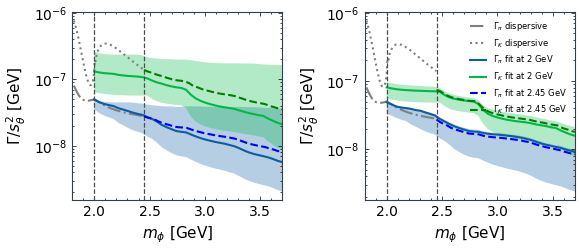

In [90]:
from decay_widths import gamma_gg,gamma_ss

fig,ax=plt.subplots(1,2,figsize=(6,2.7))
plot_mass=m_error_fit*1e-3
"""
ax[0].fill_between(pi_data[:400,0], pi_data[:400,2],pi_data[:400,3],alpha=0.3,interpolate=True)
ax[0].fill_between(K_data[:400,0], K_data[:400,2],K_data[:400,3],alpha=0.3,interpolate=True)
"""
cutoff=330
ax[0].plot(pi_data[cutoff:,0],pi_data[cutoff:,1],linestyle='-.',color='grey')
ax[0].plot(K_data[cutoff:,0],K_data[cutoff:,1],linestyle=':',color='grey')

def get_plotable_data(data):
    br_pi=np.array([d['pi']['BR central'] for d in data])
    gamma_pi=np.array([d['pi']['gamma central'] for d in data])
    br_K=np.array([d['K']['BR central'] for d in data])
    gamma_K=np.array([d['K']['gamma central'] for d in data])
    pi_upper=np.array([d['pi']['gamma upper'] for d in data])
    pi_lower=np.array([d['pi']['gamma lower'] for d in data])
    K_upper=np.array([d['K']['gamma upper'] for d in data])
    K_lower=np.array([d['K']['gamma lower'] for d in data])
    gamma_upper=np.array([d['gamma total']['gamma upper'] for d in data])
    gamma_lower=np.array([d['gamma total']['gamma lower'] for d in data])
    return br_pi,gamma_pi,br_K,gamma_K,pi_upper,pi_lower,K_upper,K_lower,gamma_upper,gamma_lower

m_error_fit=np.linspace(2000,3700,40)
plot_mass=m_error_fit*1e-3
br_pi,gamma_pi,br_K,gamma_K,pi_upper,pi_lower,K_upper,K_lower,gamma_upper,gamma_lower=get_plotable_data(all_brs_at2_spin)
ax[0].plot(plot_mass,gamma_pi)
ax[0].fill_between(plot_mass, pi_lower,pi_upper,alpha=0.3,interpolate=True)
ax[0].plot(plot_mass,gamma_K)
ax[0].fill_between(plot_mass, K_lower,K_upper,alpha=0.3,interpolate=True)
ax[0].axvline(2.45, linestyle='--', color='0.3',linewidth=0.9)
ax[0].axvline(2, linestyle='--', color='0.3',linewidth=0.9)

file_path = 'pkls_for_plots/brs_with_errors_minos.pkl'
with open(file_path, 'rb') as f:
    all_brs_spin = pickle.load(f)

m_error_fit=np.linspace(2450,3700,50)
plot_mass=m_error_fit*1e-3
br_pi,gamma_pi,br_K,gamma_K,pi_upper,pi_lower,K_upper,K_lower,gamma_upper,gamma_lower=get_plotable_data(all_brs_spin)
ax[0].plot(plot_mass,gamma_pi,linestyle='--',color='blue')
ax[0].plot(plot_mass,gamma_K,linestyle='--',color='green')

ax[0].set_yscale('log')
ax[0].set_xlim(1.8,3.7)
ax[0].set_xlabel(r'$m_\phi$ [GeV]',fontsize=11)
ax[0].set_ylabel(r'$\Gamma/s_\theta^2$ [GeV]',fontsize=11)
#fig.legend()


ax[1].plot(pi_data[cutoff:,0],pi_data[cutoff:,1],label=r'$\Gamma_\pi$ dispersive',linestyle='-.',color='grey')
ax[1].plot(K_data[cutoff:,0],K_data[cutoff:,1],label=r'$\Gamma_K$ dispersive',linestyle=':',color='grey')

m_error_fit=np.linspace(2000,3700,40)
plot_mass=m_error_fit*1e-3
br_pi,gamma_pi,br_K,gamma_K,pi_upper,pi_lower,K_upper,K_lower,gamma_upper,gamma_lower=get_plotable_data(all_brs_at2_oam)
ax[1].plot(plot_mass,gamma_pi,label=r'$\Gamma_\pi$ fit at 2 GeV')
ax[1].fill_between(plot_mass, pi_lower,pi_upper,alpha=0.3,interpolate=True)
ax[1].plot(plot_mass,gamma_K,label=r'$\Gamma_K$ fit at 2 GeV')
ax[1].fill_between(plot_mass, K_lower,K_upper,alpha=0.3,interpolate=True)
ax[1].axvline(2.45, linestyle='--', color='0.3',linewidth=0.9)
ax[1].axvline(2, linestyle='--', color='0.3',linewidth=0.9)

plot_mass=np.linspace(2450,3700,40)*1e-3
file_path = 'pkls_for_plots/brs_with_errors_minos_oam.pkl'
with open(file_path, 'rb') as f:
    all_brs_spin = pickle.load(f)

br_pi,gamma_pi,br_K,gamma_K,pi_upper,pi_lower,K_upper,K_lower,gamma_upper,gamma_lower=get_plotable_data(all_brs_spin)
ax[1].plot(plot_mass,gamma_pi,label=r'$\Gamma_\pi$ fit at 2.45 GeV',linestyle='--',color='blue')
ax[1].plot(plot_mass,gamma_K,label=r'$\Gamma_K$ fit at 2.45 GeV',linestyle='--',color='green')

ax[1].set_xlim(1.8,3.7)
ax[1].set_yscale('log')
ax[1].set_xlabel(r'$m_\phi$ [GeV]',fontsize=11)
ax[1].set_ylabel(r'$\Gamma/s^2_\theta$ [GeV]',fontsize=11)
ax[1].legend(loc='upper right', fontsize=6,ncol=1)
# fig.legend(loc='outside center')
plt.tight_layout()
# lines_labels = [ax.get_legend_handles_labels() for ax in fig.axes]
# lines, labels = [sum(lol, []) for lol in zip(*lines_labels)]
# fig.legend(lines, labels,loc='outside upper center', ncol=3, fontsize=10,frameon=True)
plt.savefig('/home/henry/Documents/Uni/Masterarbeit/latex-thesis/plots/fit_at2_comparison.pdf')
plt.show()


# ten lowest mass final states

In [42]:
mesons=p.findall(lambda x: x.pdgid.is_meson and x.mass<2000)
mesons = sorted(mesons, key=lambda x: x.mass)


def is_neutral(p):
    return p.anti_flag.name=='Same'

def are_antiparticles(p1,p2):
    return int(p1.pdgid)==-int(p2.pdgid)

def check_meson_combinations( m1, m2):

    # Check C conservation for particle - antiparticle
    if (not is_neutral(m1) or not is_neutral(m2)) and not are_antiparticles(m1, m2): return False

    # Check C and P for neutral mesons
    if is_neutral(m1) and is_neutral(m2):
            if m1.C!=m2.C: return False                                                                      #check charge conjugation eigenvalue
            if m1.J==0 and m2.J==0 and m1.P!=m2.P: return False
            if ((m1.J==1 and m2.J==0) or (m1.J==0 and m2.J==1)) and m1.P!=(-1)*m2.P: return False            #parity must be opposite for l=1
            if ((m1.J==2 and m2.J==0) or (m1.J==0 and m2.J==2)) and m1.P!=m2.P: return False                 #parity must be same for l=2
            if ((m1.J==3 and m2.J==0) or (m1.J==0 and m2.J==3)) and m1.P!=(-1)*m2.P: return False            #parity must be opposite for l=3

    # Check isospin conservation
    if m1.I != m2.I: return False
    return True

In [51]:
pairs_charged=[]
pairs_neutral=[]
for i,m1 in enumerate(mesons):
    for m2 in mesons[i:]:
        if m1.charge!=0 and (m1.charge==(-1)*m2.charge) and ((m1.pdgid.has_strange and m2.pdgid.has_strange) or (not m1.pdgid.has_strange and not m2.pdgid.has_strange)):
            pairs_charged.append((m1,m2))
        if m1.charge==0 and m2.charge==0 and ((m1.pdgid.has_strange and m2.pdgid.has_strange) or (not m1.pdgid.has_strange and not m2.pdgid.has_strange)):
            pairs_neutral.append((m1,m2))
pairs_charged = sorted(pairs_charged, key=lambda x: x[0].mass + x[1].mass)
pairs_neutral = sorted(pairs_neutral, key=lambda x: x[0].mass + x[1].mass)
for pair in pairs_charged:
    print(*pair, pair[0].mass+pair[1].mass,check_meson_combinations(pair[0],pair[1]))
    print(f'\tC: {pair[0].C} {pair[1].C}, P: {pair[0].P} {pair[1].P}, I: {pair[0].I} {pair[1].I}, J: {pair[0].J} {pair[1].J}')
    m1=pair[0]
    m2=pair[1]
    if m1.C!=m2.C: print('\tC wrong')                                                                      #check charge conjugation eigenvalue
    if m1.J==0 and m2.J==0 and m1.P!=m2.P: print('\tP wrong')
    if ((m1.J==1 and m2.J==0) or (m1.J==0 and m2.J==1)) and m1.P!=(-1)*m2.P:print('\tP wrong')
    if ((m1.J==2 and m2.J==0) or (m1.J==0 and m2.J==2)) and m1.P!=m2.P:print('\tP wrong')
    if ((m1.J==3 and m2.J==0) or (m1.J==0 and m2.J==3)) and m1.P!=(-1)*m2.P: print('\tP wrong')
    if m1.I != m2.I: print('\tI wrong')

pi+ pi- 279.14078 True
	C: 5 5, P: -1 -1, I: 1.0 1.0, J: 0.0 0.0
pi+ rho(770)- 914.68039 False
	C: 5 5, P: -1 -1, I: 1.0 1.0, J: 0.0 1.0
	P wrong
pi- rho(770)+ 914.68039 False
	C: 5 5, P: -1 -1, I: 1.0 1.0, J: 0.0 1.0
	P wrong
K+ K- 987.354 True
	C: 5 5, P: -1 -1, I: 0.5 0.5, J: 0.0 0.0
pi+ a(0)(980)- 1119.57039 False
	C: 5 5, P: -1 1, I: 1.0 1.0, J: 0.0 0.0
	P wrong
pi- a(0)(980)+ 1119.57039 False
	C: 5 5, P: -1 1, I: 1.0 1.0, J: 0.0 0.0
	P wrong
K+ K(0)*(700)- 1338.6770000000001 False
	C: 5 5, P: -1 1, I: 0.5 0.5, J: 0.0 0.0
	P wrong
K- K(0)*(700)+ 1338.6770000000001 False
	C: 5 5, P: -1 1, I: 0.5 0.5, J: 0.0 0.0
	P wrong
pi+ b(1)(1235)- 1369.07039 False
	C: 5 5, P: -1 1, I: 1.0 1.0, J: 0.0 1.0
pi- b(1)(1235)+ 1369.07039 False
	C: 5 5, P: -1 1, I: 1.0 1.0, J: 0.0 1.0
pi+ a(1)(1260)- 1369.57039 False
	C: 5 5, P: -1 1, I: 1.0 1.0, J: 0.0 1.0
pi- a(1)(1260)+ 1369.57039 False
	C: 5 5, P: -1 1, I: 1.0 1.0, J: 0.0 1.0
K+ K*(892)- 1385.347 False
	C: 5 5, P: -1 -1, I: 0.5 0.5, J: 0.0 1.0
	P 

In [52]:
for pair in pairs_neutral:
    print(*pair, pair[0].mass+pair[1].mass,check_meson_combinations(pair[0],pair[1]))
    print(f'\tC: {pair[0].C} {pair[1].C}, P: {pair[0].P} {pair[1].P}, I: {pair[0].I} {pair[1].I}, J: {pair[0].J} {pair[1].J}')
    m1=pair[0]
    m2=pair[1]
    if m1.C!=m2.C: print('\tC wrong')
    if m1.J==0 and m2.J==0 and m1.P!=m2.P: print('\tP wrong')
    if ((m1.J==1 and m2.J==0) or (m1.J==0 and m2.J==1)) and m1.P!=(-1)*m2.P:print('\tP wrong')
    if ((m1.J==2 and m2.J==0) or (m1.J==0 and m2.J==2)) and m1.P!=m2.P:print('\tP wrong')
    if ((m1.J==3 and m2.J==0) or (m1.J==0 and m2.J==3)) and m1.P!=(-1)*m2.P: print('\tP wrong')
    if m1.I != m2.I: print('\tI wrong')

pi0 pi0 269.9536 True
	C: 1 1, P: -1 -1, I: 1.0 1.0, J: 0.0 0.0
pi0 eta 682.8388 False
	C: 1 1, P: -1 -1, I: 1.0 0.0, J: 0.0 0.0
	I wrong
pi0 f(0)(500) 734.9768 False
	C: 1 1, P: -1 1, I: 1.0 0.0, J: 0.0 0.0
	P wrong
	I wrong
pi0 rho(770)0 910.2368 False
	C: 1 -1, P: -1 -1, I: 1.0 1.0, J: 0.0 1.0
	C wrong
	P wrong
pi0 omega(782) 917.6368 False
	C: 1 -1, P: -1 -1, I: 1.0 0.0, J: 0.0 1.0
	C wrong
	P wrong
	I wrong
K(L)0 K(L)0 995.222 True
	C: 5 5, P: -1 -1, I: 0.5 0.5, J: 0.0 0.0
K(L)0 K(S)0 995.222 True
	C: 5 5, P: -1 -1, I: 0.5 0.5, J: 0.0 0.0
K(L)0 K0 995.222 False
	C: 5 5, P: -1 -1, I: 0.5 0.5, J: 0.0 0.0
K(L)0 K~0 995.222 False
	C: 5 5, P: -1 -1, I: 0.5 0.5, J: 0.0 0.0
K(S)0 K(S)0 995.222 True
	C: 5 5, P: -1 -1, I: 0.5 0.5, J: 0.0 0.0
K(S)0 K0 995.222 False
	C: 5 5, P: -1 -1, I: 0.5 0.5, J: 0.0 0.0
K(S)0 K~0 995.222 False
	C: 5 5, P: -1 -1, I: 0.5 0.5, J: 0.0 0.0
K0 K0 995.222 False
	C: 5 5, P: -1 -1, I: 0.5 0.5, J: 0.0 0.0
K0 K~0 995.222 True
	C: 5 5, P: -1 -1, I: 0.5 0.5, J: 0.0 0

Generated 48 initial meson pairs.


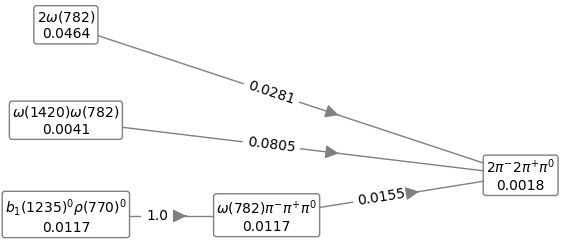

In [91]:
SH=ScalarHadronizer(2450,strange_weight=1.0215839592483356,spin_suppression=0.08655356535516996,gamma_fac=0.99998624832845)
SH.simulateDecay()
SH.plot_from_final_state((-211,-211,111,211,211),figsize=(7.1,3),path='/home/henry/Documents/Uni/Masterarbeit/latex-thesis/plots/decay_graph_omega.pdf')

# graph plot for thesis

In [7]:
SH=ScalarHadronizer(2000,strange_weight=1.0215839592483356,spin_suppression=0.08655356535516996,gamma_fac=0.99998624832845)
decay_graph=SH.simulateDecay()

Generated 26 initial meson pairs.


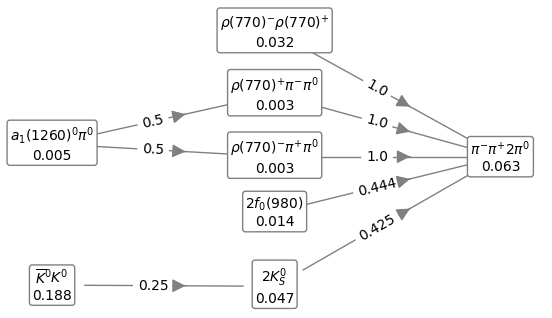

In [30]:

import matplotlib.pyplot as plt 
from matplotlib.patches import FancyArrowPatch
from networkx.drawing.nx_agraph import to_agraph, from_agraph, graphviz_layout
import networkx as nx

figsize=(7,4)
state=(-211,111,111,211)
ancestors=nx.ancestors(decay_graph,state)
subgraph = decay_graph.subgraph(ancestors.union({state}))
round_val=3

final_nodes = [node for node in subgraph.nodes() if subgraph.out_degree(node) == 0]

pos = nx.drawing.nx_agraph.graphviz_layout(subgraph, prog="dot", args="-Grankdir=LR")
pos[state]=(pos[state][0],pos[(-213,111,211)][1])
pos[(9010221, 9010221)]=(pos[(310,310)][0],pos[(9010221, 9010221)][1])
edge_labels = {key:round(val,round_val) for key,val in nx.get_edge_attributes(subgraph,'weight').items()}
node_labels = {key:SH.get_latex_id(key)+'\n'+str(round(val,round_val)) for key,val in nx.get_node_attributes(subgraph,'weight').items()}
plt.figure(figsize=figsize)
nx.draw_networkx_edges(subgraph, pos, edgelist=subgraph.edges(), edge_color='gray',arrows=False)
nx.draw_networkx_edge_labels(subgraph, pos, edge_labels=edge_labels, font_size=10, label_pos=0.45)

for node, (x, y) in pos.items():
    plt.text(x, y, node_labels[node], ha='center', va='center', fontsize=10, bbox=dict(facecolor='white', edgecolor='grey', boxstyle='round,pad=0.2'))


nx.draw_networkx_nodes(subgraph, pos,node_size=2000, node_color='white')


for (u, v) in subgraph.edges():
    # Calculate the midpoint of the edge
    x1, y1 = pos[u]
    x2, y2 = pos[v]
    midpoint = ((x1 + x2) / 2, (y1 + y2) / 2)
    edge_length = np.sqrt((x2 - x1) ** 2 + (y2 - y1) ** 2)
    direction = np.arctan2(y2 - y1, x2 - x1)
    shift_distance = 0.1*edge_length  # Adjust this value to move the arrowhead further
    arrow_x = midpoint[0] + shift_distance * np.cos(direction)
    arrow_y = midpoint[1] + shift_distance * np.sin(direction)

    # Draw the arrow
    arrow = FancyArrowPatch(
        (arrow_x, arrow_y),
        (arrow_x + 0.001 * np.cos(direction), arrow_y + 0.001 * np.sin(direction)),
        arrowstyle='-|>', mutation_scale=20, color='gray')
            # Calculate the direction of the arrow

    plt.gca().add_patch(arrow)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)
plt.axis('off')
plt.savefig('/home/henry/Documents/Uni/Masterarbeit/latex-thesis/plots/decay_graph.pdf')
plt.show()

In [117]:
SH=ScalarHadronizer(2450,strange_weight=0.5,spin_suppression=0,gamma_fac=1,suppression_mode='OAM')
SH.simulateDecay()

Generated 31 initial meson pairs.


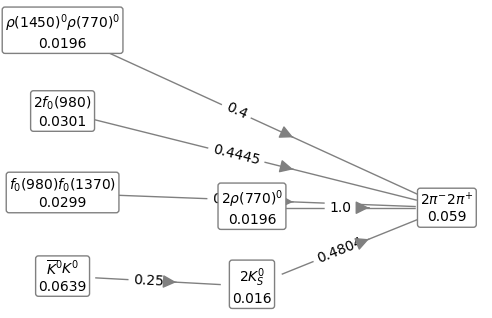

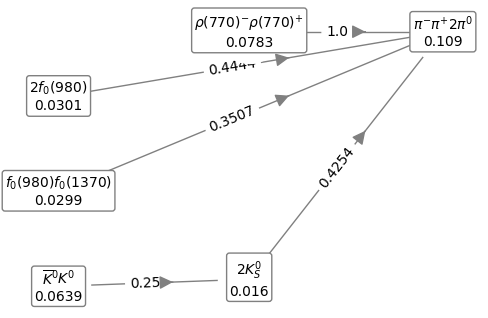

In [110]:
SH.plot_from_final_state((-211,-211,211,211))
SH.plot_from_final_state((-211,111,111,211))